## 用户消费行为分析
#### 1.导入数据
##### 数据标签：user_id 用户ID, order_dt 购买时间, order_products 产品数量, order_amount 购买金额
##### 数据时间：1997.1~1998.6 约7W数据


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='KaiTi')

columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
df = pd.read_table('../dataSets/3.User_consumption_behavior/CDNOW_master.txt', names=columns, sep='\\s+')
df['order_dt'] = pd.to_datetime(df['order_dt'], format='%Y%m%d')
df

,user_id,order_dt,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [2]:
# 将日期转换为月份精度
df['order_time'] = df['order_dt'].dt.to_period('M')
df

,user_id,order_dt,order_products,order_amount,order_time
0,1,1997-01-01,1,11.77,1997-01
1,2,1997-01-12,1,12.00,1997-01
2,2,1997-01-12,5,77.00,1997-01
3,3,1997-01-02,2,20.76,1997-01
4,3,1997-03-30,2,20.76,1997-03
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04
69655,23568,1997-04-22,1,14.99,1997-04
69656,23569,1997-03-25,2,25.74,1997-03
69657,23570,1997-03-25,3,51.12,1997-03


Text(0.5, 1.0, '每月购买人数')

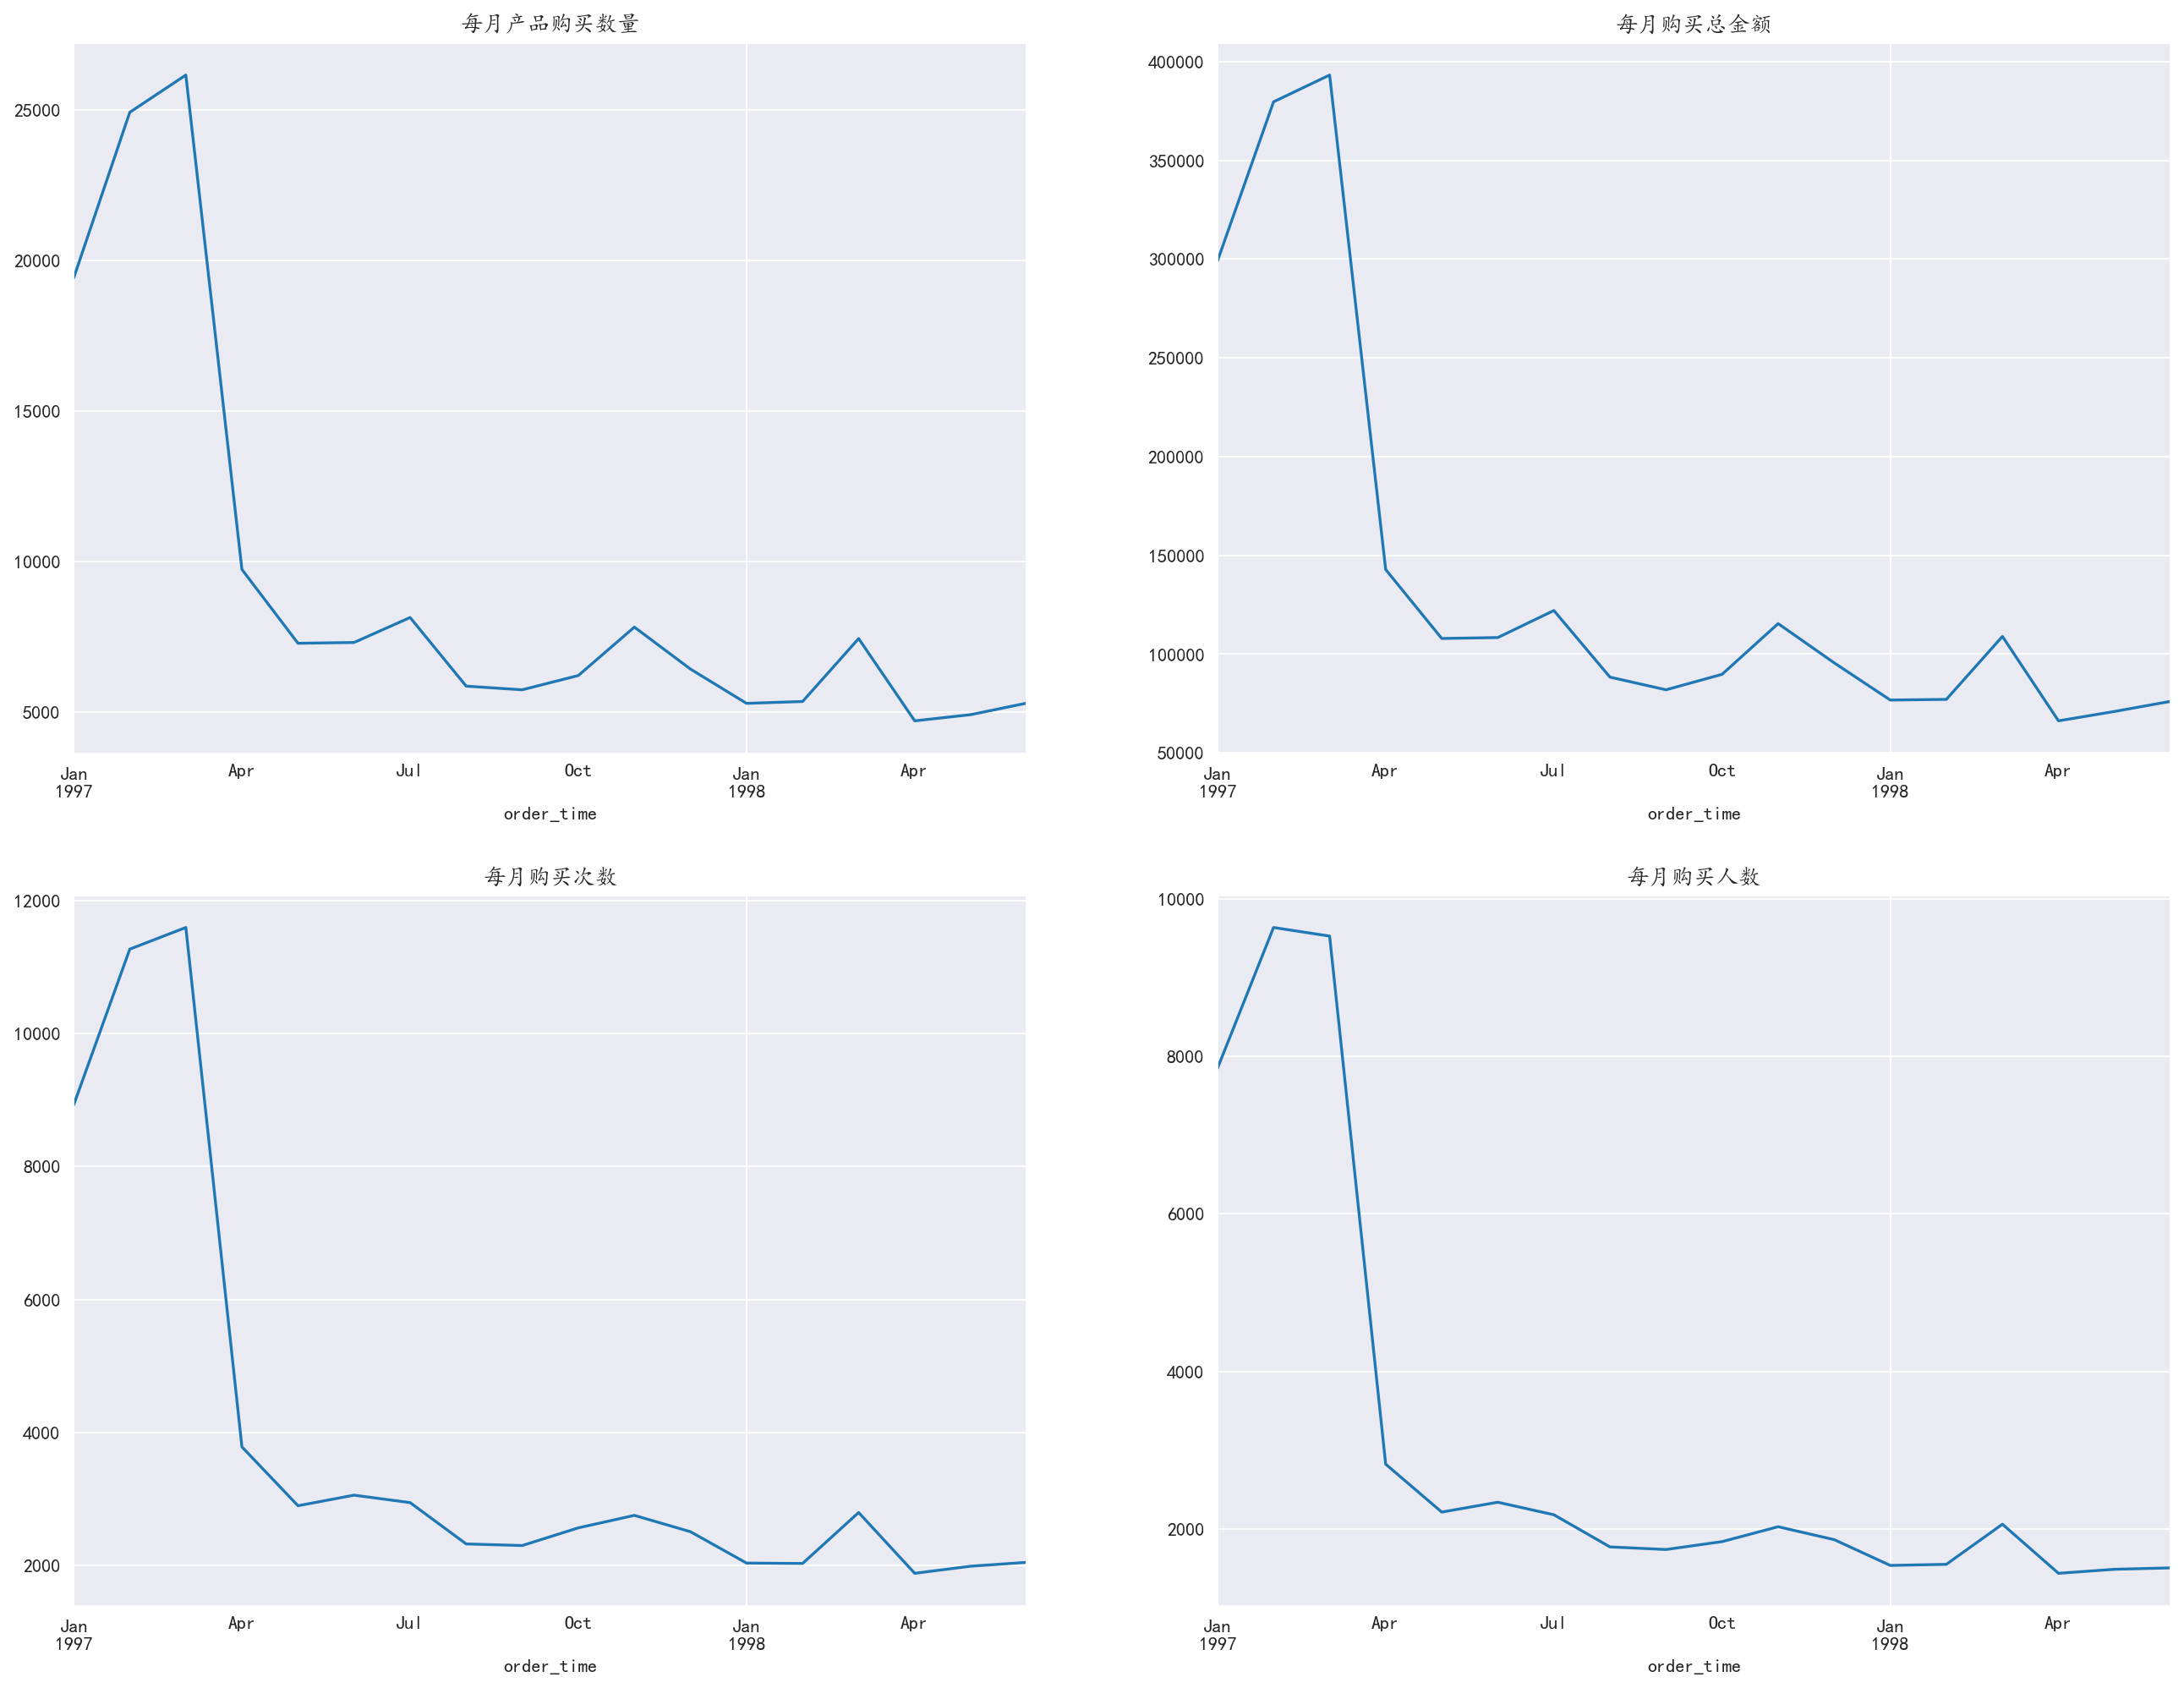

In [3]:
# 按月份分析销售数量，销售金额，销售次数，销售人数
plt.figure(figsize=(20, 15), dpi=160)
# 每月购买数量
consume_num = df.groupby(by='order_time')['order_products'].sum()
plt.subplot(221)
consume_num.plot()
plt.title('每月产品购买数量')
# 每月购买总金额
consume_sum = df.groupby(by='order_time')['order_amount'].sum()
plt.subplot(222)
consume_sum.plot()
plt.title('每月购买总金额')
# 每月销售次数
consume_count = df.groupby(by='order_time')['user_id'].count()
plt.subplot(223)
consume_count.plot()
plt.title('每月购买次数')
# 每月销售人数
consume_person = df.groupby(by='order_time')['user_id'].apply(lambda x: len(x.drop_duplicates()))
plt.subplot(224)
consume_person.plot()
plt.title('每月购买人数')

### 用户个体消费分析
##### 用户消费金额，消费次数

In [4]:
# 用户消费金额
user_consume = df.groupby(by='user_id')[['order_products', 'order_amount']].sum()
print(user_consume.describe())
print(f'用户数量：{len(user_consume)} 个')

       order_products  order_amount
count    23570.000000  23570.000000
mean         7.122656    106.080426
std         16.983531    240.925195
min          1.000000      0.000000
25%          1.000000     19.970000
50%          3.000000     43.395000
75%          7.000000    106.475000
max       1033.000000  13990.930000
用户数量：23570 个


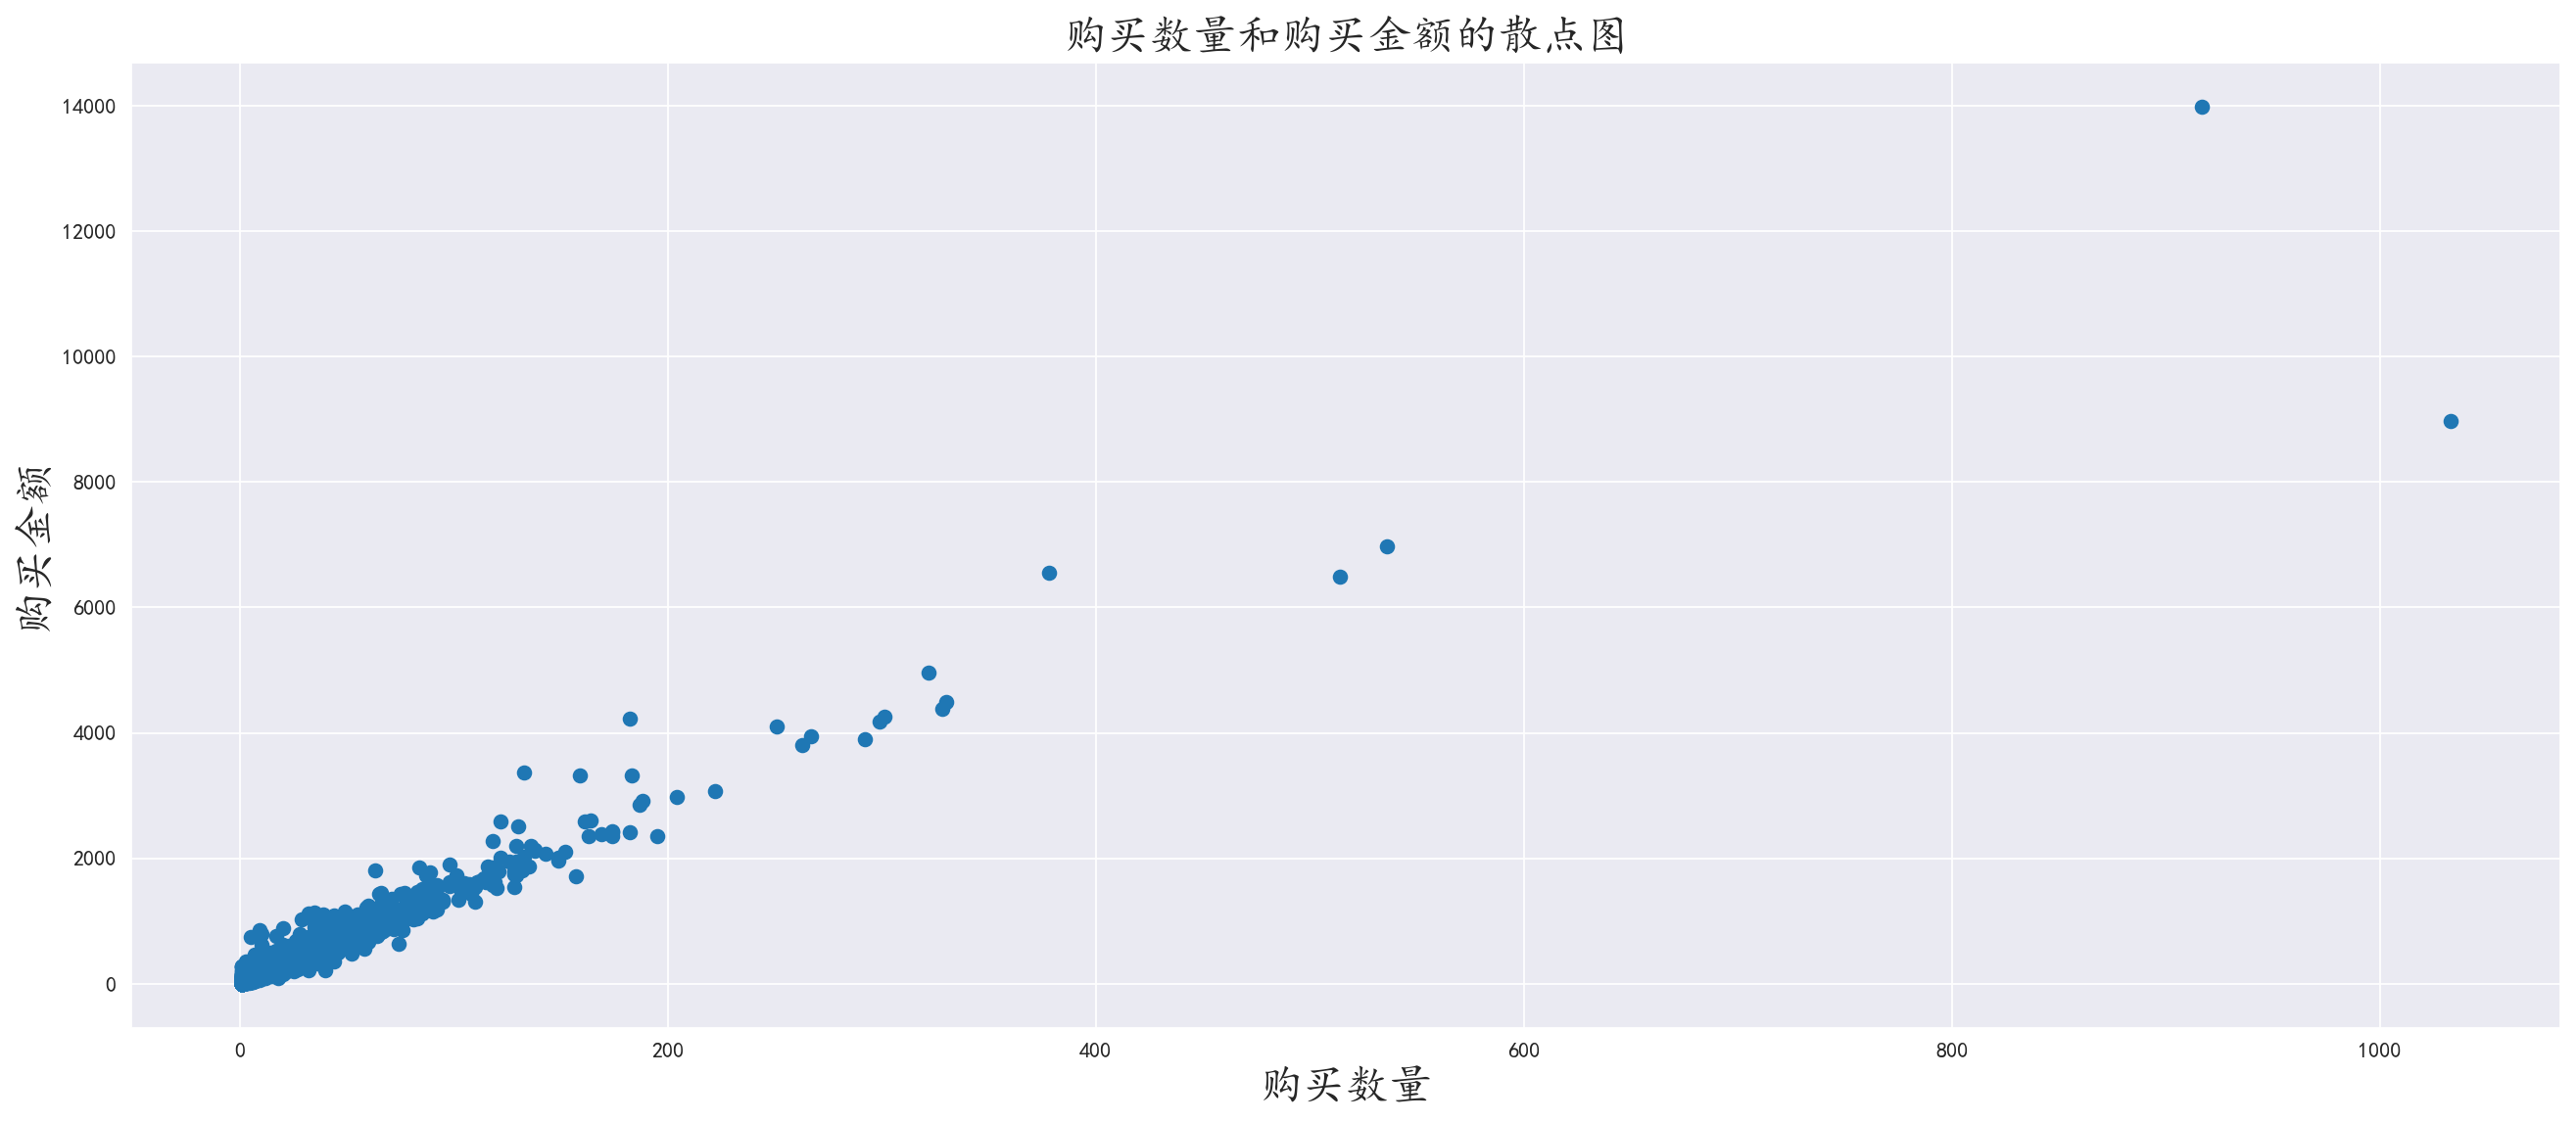

In [5]:
# 绘制购买数量和购买金额的散点图
x = user_consume['order_products']
y = user_consume['order_amount']

plt.figure(figsize=(20, 8), dpi=160)

plt.scatter(x, y)
plt.title('购买数量和购买金额的散点图', fontsize=20)
plt.xlabel('购买数量', fontsize=20)
plt.ylabel('购买金额', fontsize=20)
plt.show()

Text(0.5, 1.0, '购买金额主力人群图')

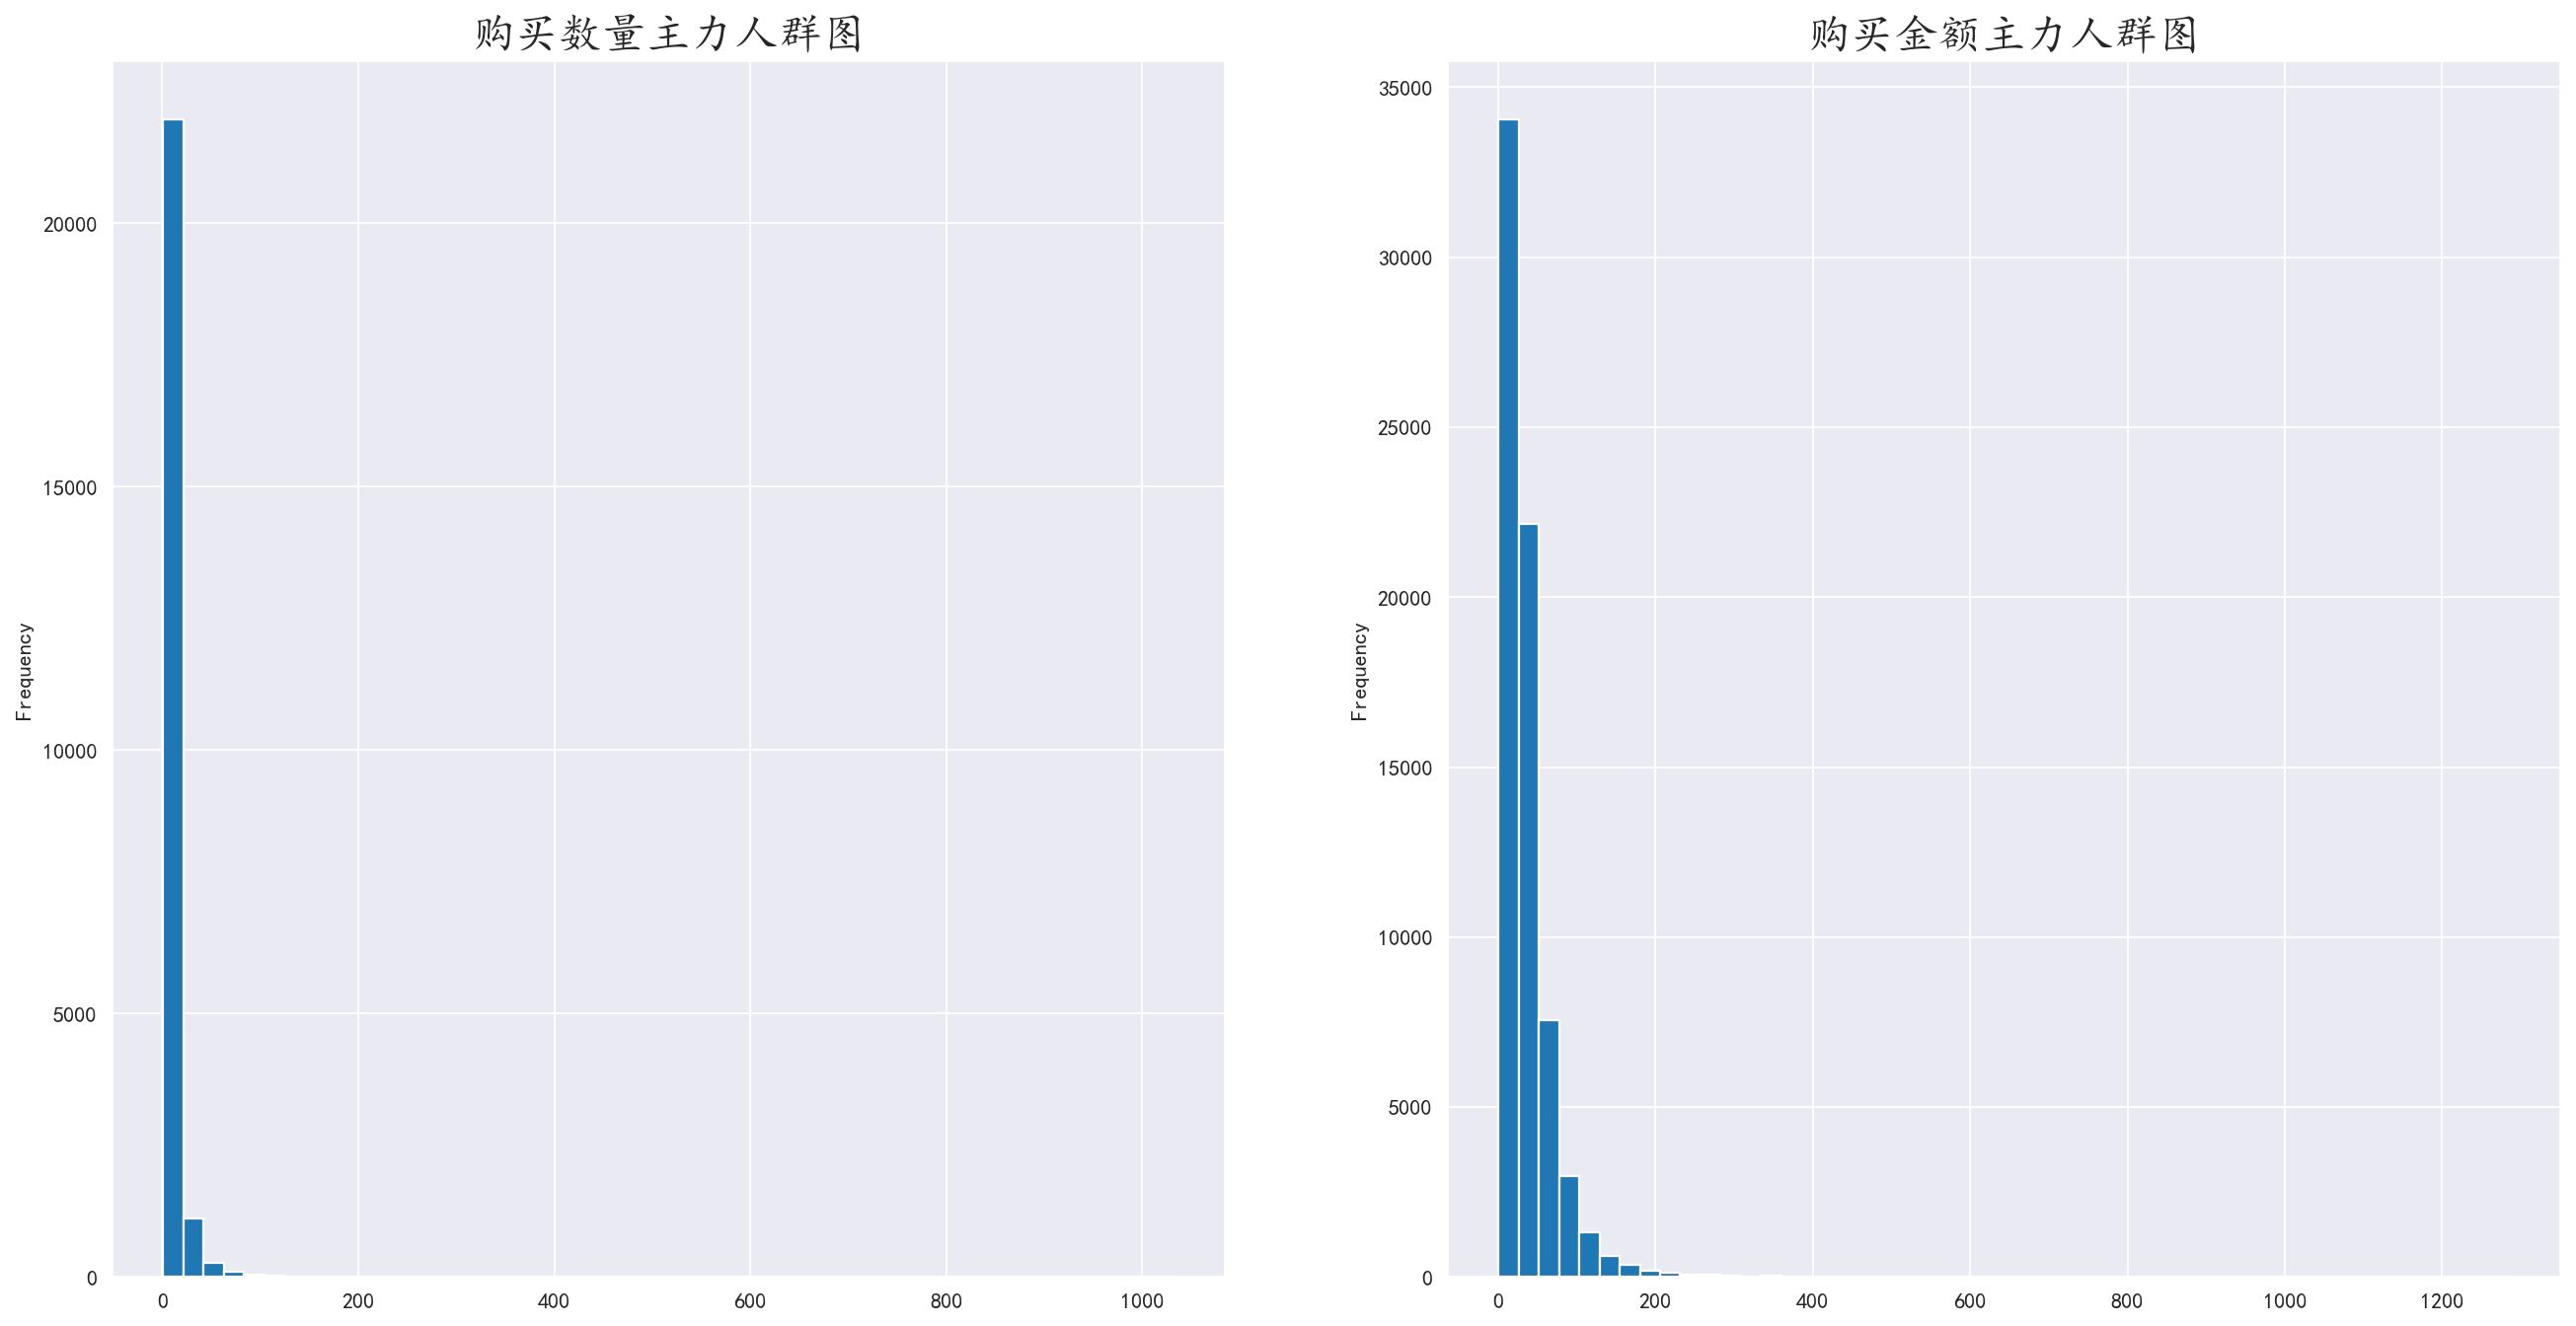

In [6]:
# 分析购买数量和购买金额的主力人群
# 购买数量的主力人群
plt.figure(figsize=(20, 10), dpi=160)
plt.subplot(121)
user_consume['order_products'].plot(kind='hist', bins=50)
plt.title('购买数量主力人群图', fontsize=20)
# 购买金额的主力人群
plt.subplot(122)
df['order_amount'].plot(kind='hist', bins=50)
plt.title('购买金额主力人群图', fontsize=20)

### 用户消费贡献度


Text(0, 0.5, '贡献百分比')

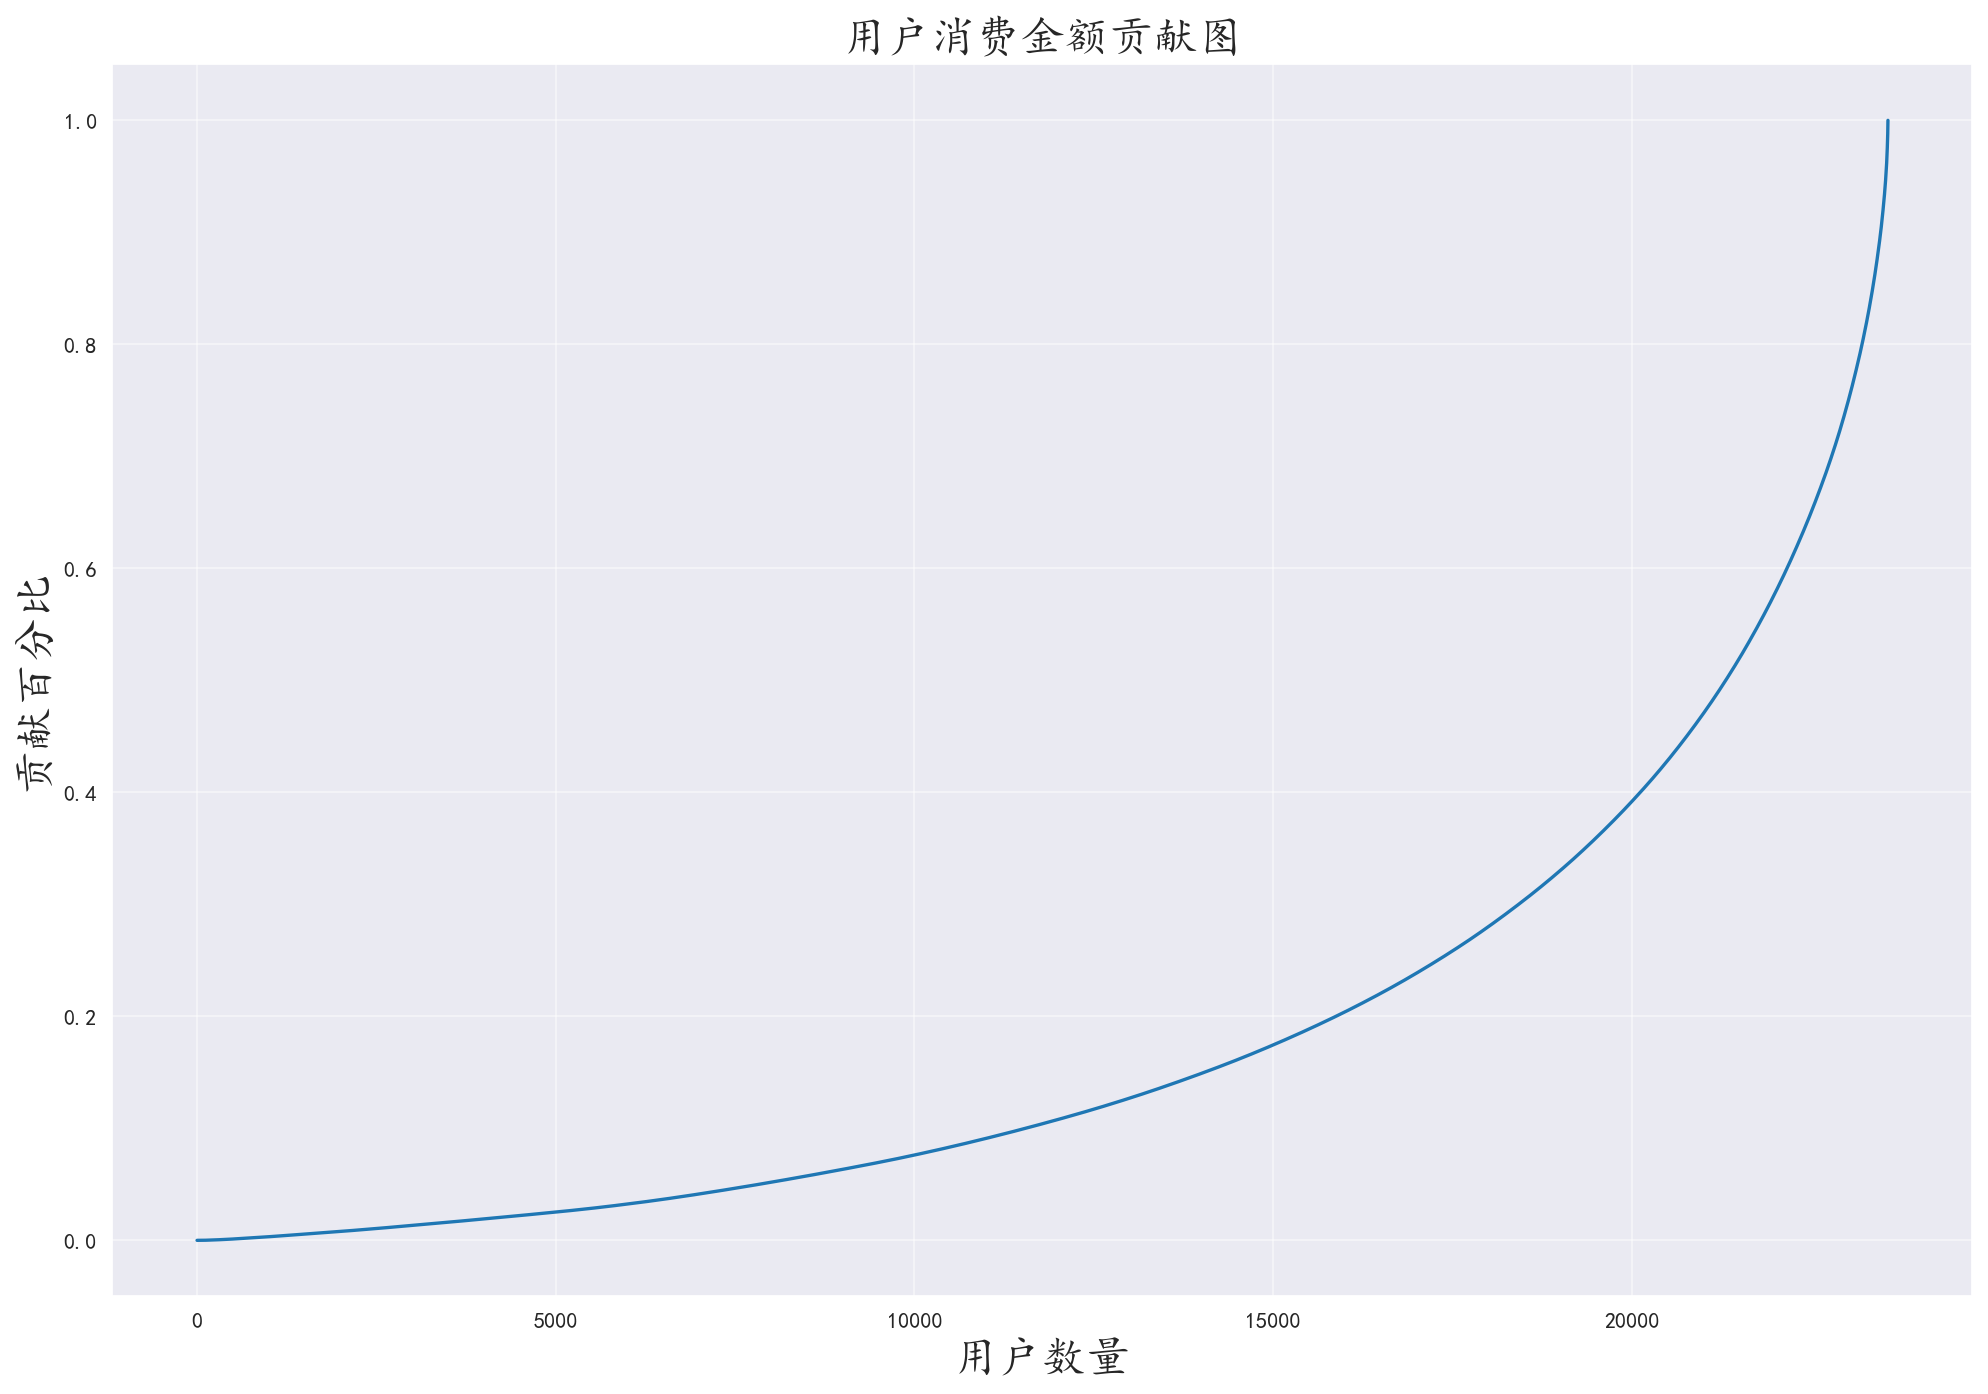

In [7]:
# 计算出总消费金额
total_amount = df['order_amount'].sum().round(2)

user_consume.sort_values(by='order_amount', inplace=True)
user_consume['user_cumsum'] = user_consume['order_amount'].cumsum()

user_consume['consume_donation'] = user_consume['user_cumsum'] / total_amount
user_consume.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15, 10), dpi=160)
user_consume['consume_donation'].plot()

plt.grid(alpha=0.5)

plt.title('用户消费金额贡献图', fontsize=20)
plt.xlabel('用户数量', fontsize=20)
plt.ylabel('贡献百分比', fontsize=20)


### 用户首购时间分析


Text(0, 0.5, '首次购买用户数量')

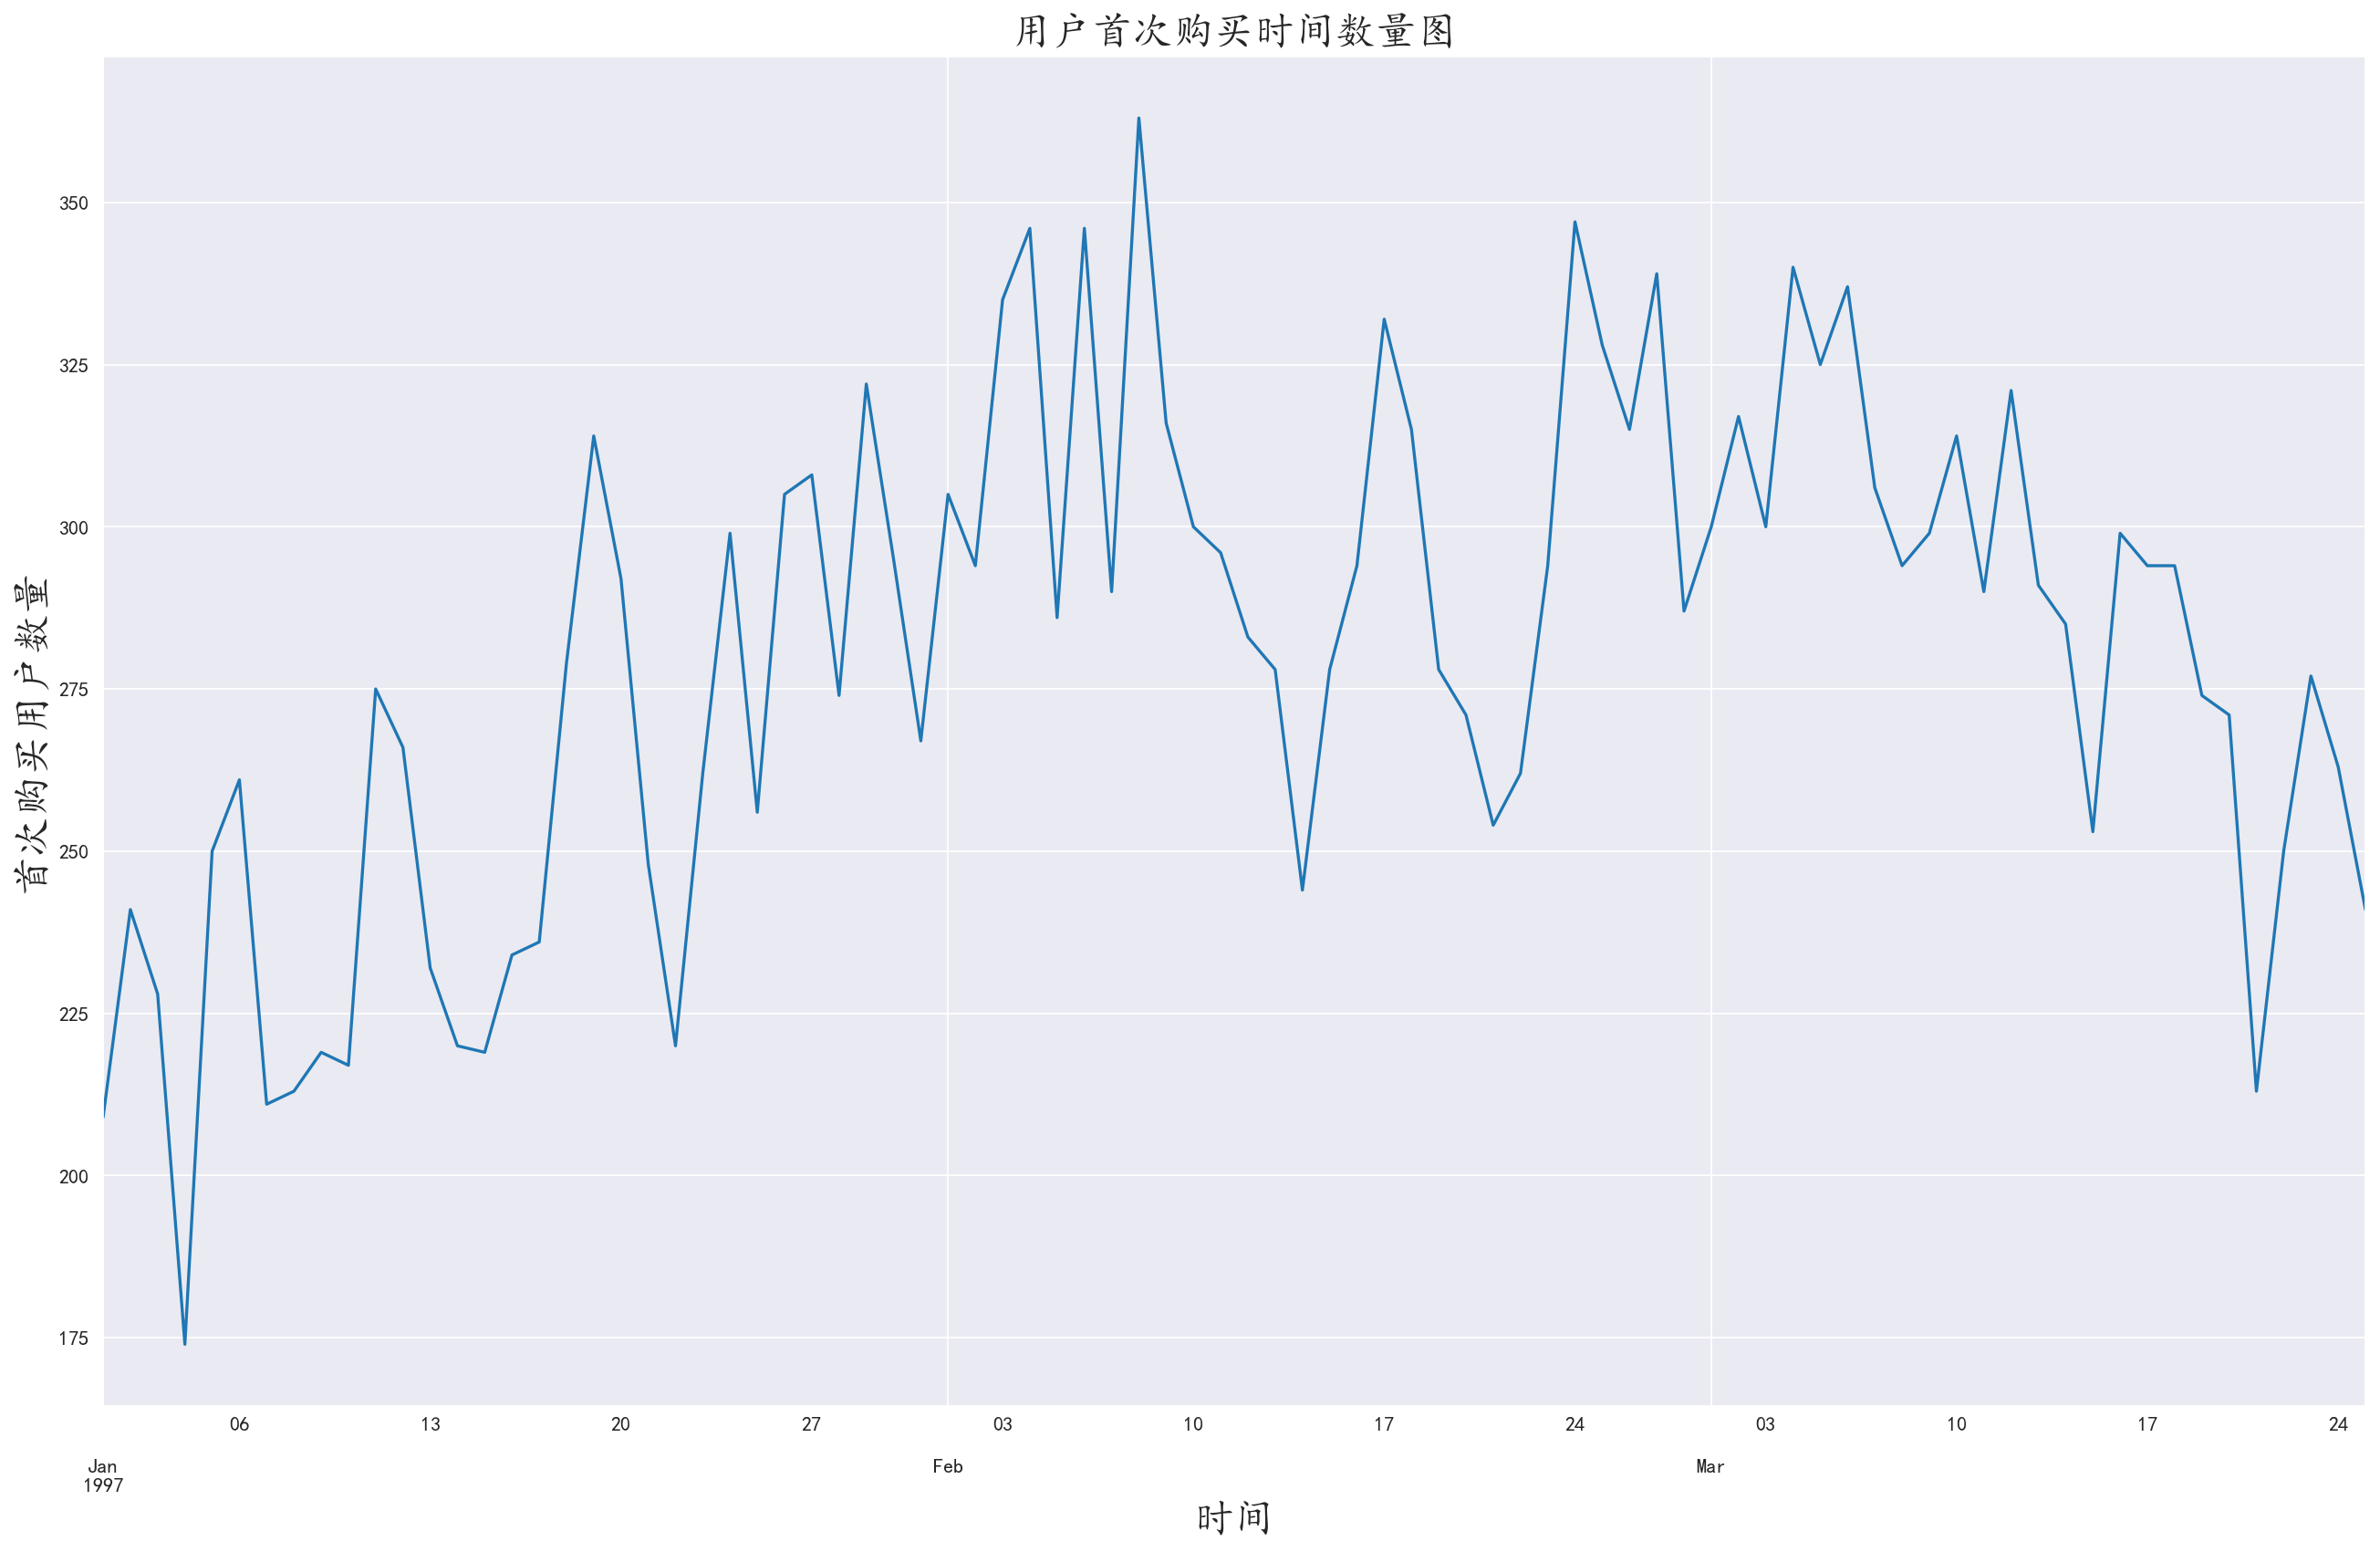

In [8]:
# 用户首次购买时间
user_first_buy = df.groupby(by='user_id')['order_dt'].min().value_counts()
user_first_buy.sort_index(inplace=True)
plt.figure(figsize=(20, 12), dpi=160)
user_first_buy.plot()

plt.title('用户首次购买时间数量图', fontsize=20)
plt.xlabel('时间', fontsize=20)
plt.ylabel('首次购买用户数量', fontsize=20)


Text(0, 0.5, '首次购买用户数量')

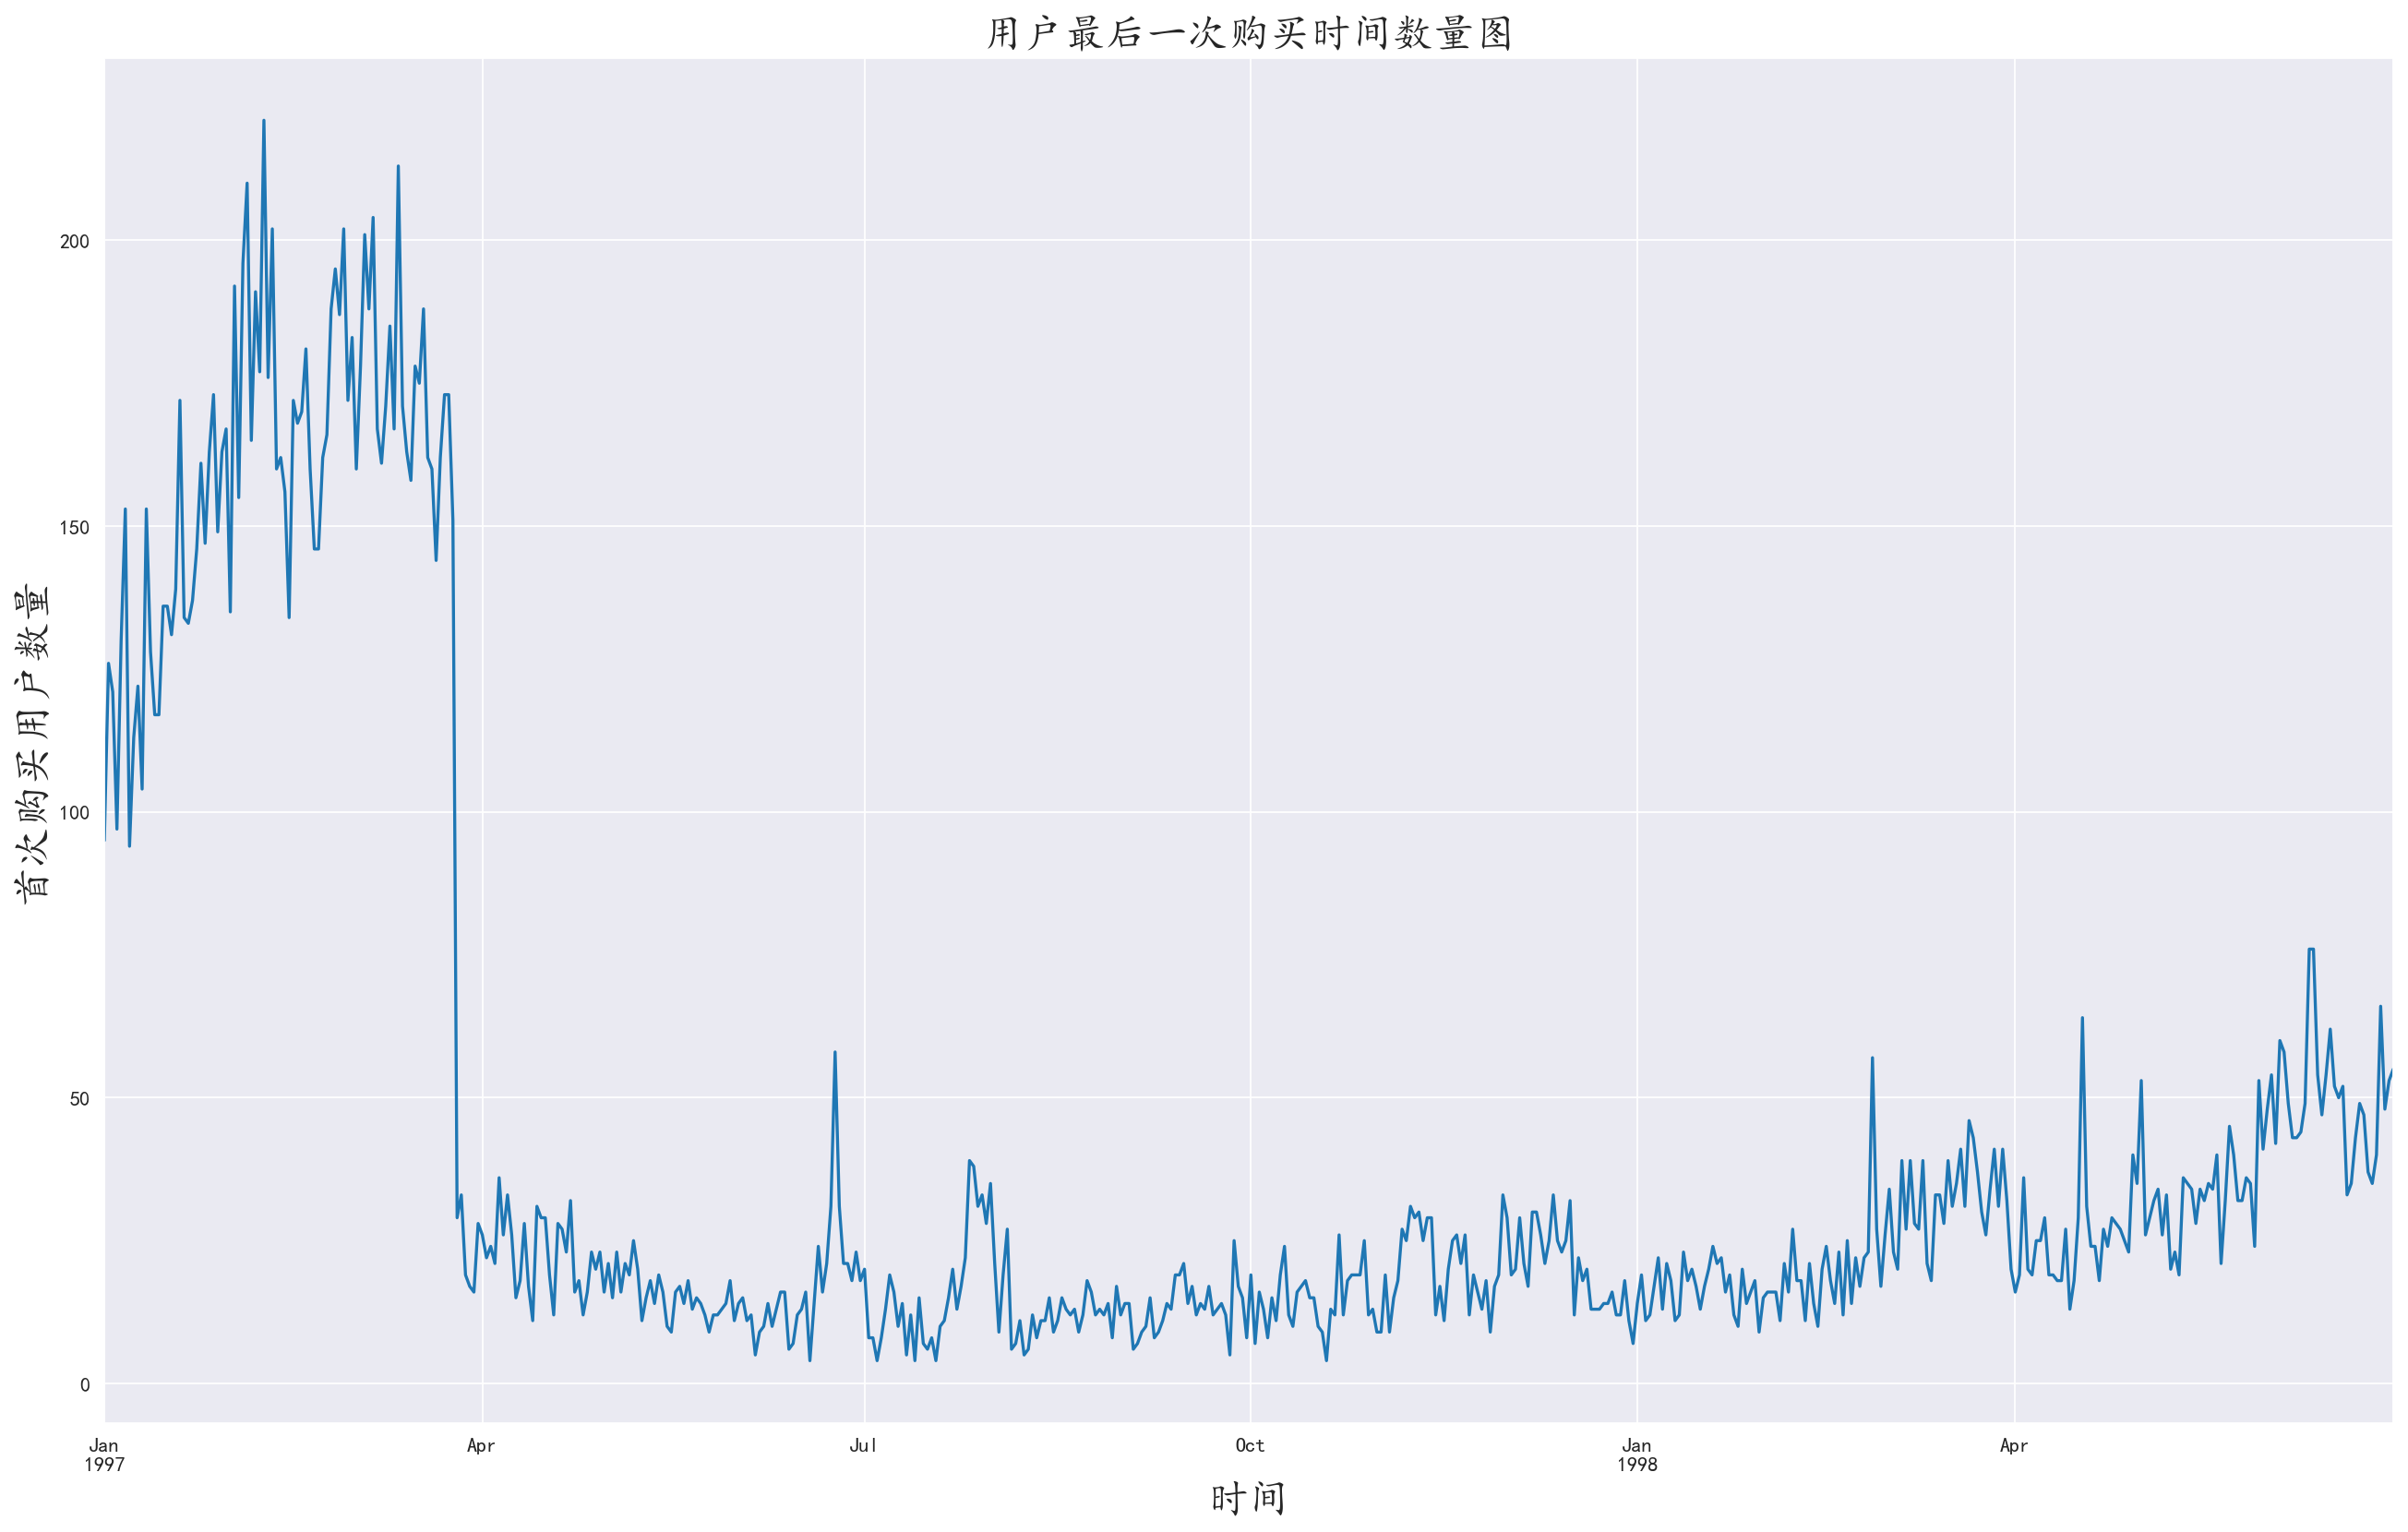

In [9]:
# 用户最后一次购买时间
user_first_buy = df.groupby(by='user_id')['order_dt'].max().value_counts()
user_first_buy.sort_index(inplace=True)
plt.figure(figsize=(20, 12), dpi=160)
user_first_buy.plot()

plt.title('用户最后一次购买时间数量图', fontsize=20)
plt.xlabel('时间', fontsize=20)
plt.ylabel('首次购买用户数量', fontsize=20)

In [10]:
df

,user_id,order_dt,order_products,order_amount,order_time
0,1,1997-01-01,1,11.77,1997-01
1,2,1997-01-12,1,12.00,1997-01
2,2,1997-01-12,5,77.00,1997-01
3,3,1997-01-02,2,20.76,1997-01
4,3,1997-03-30,2,20.76,1997-03
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04
69655,23568,1997-04-22,1,14.99,1997-04
69656,23569,1997-03-25,2,25.74,1997-03
69657,23570,1997-03-25,3,51.12,1997-03


### 用户分层
##### 构建RFM模型


In [11]:
# 使用透视表
rfm = df.pivot_table(index='user_id',  # 相当于groupby('user_id')分组
                     values=['order_amount', 'order_products', 'order_dt'], # 相当于取出哪些列
                     aggfunc={'order_dt':'max', # 最后一次购买 
                              'order_amount':'sum', # 消费总额
                              'order_products':'sum'}) # 消费数量
rfm

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [12]:
def rfm_func(x):
    level = x.apply(lambda x: '1' if x >= 1 else '0')
    label = level['R'] + level['F'] + level['M']
    table = {
        '111':'重要价值客户',
        '110':'一般价值客户',
        '011':'重要保持客户',
        '010':'一般保持客户',
        '101':'重要发展客户',
        '100':'一般发展客户',
        '001':'重要挽留客户',
        '000':'一般挽留客户',
    }
    result = table[label]
    return result
    

rfm['R'] = (rfm['order_dt'].max() - rfm['order_dt'])/np.timedelta64(1, 'D')
rfm.rename(columns={'order_amount':'M', 'order_products':'F'}, inplace=True)
rfm['label'] = rfm[['R', 'F', 'M']].apply(lambda x: x-x.mean()).apply(rfm_func, axis=1)
rfm

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般发展客户
23567,20.97,1997-03-25,1,462.0,一般发展客户
23568,121.70,1997-04-22,6,434.0,重要发展客户


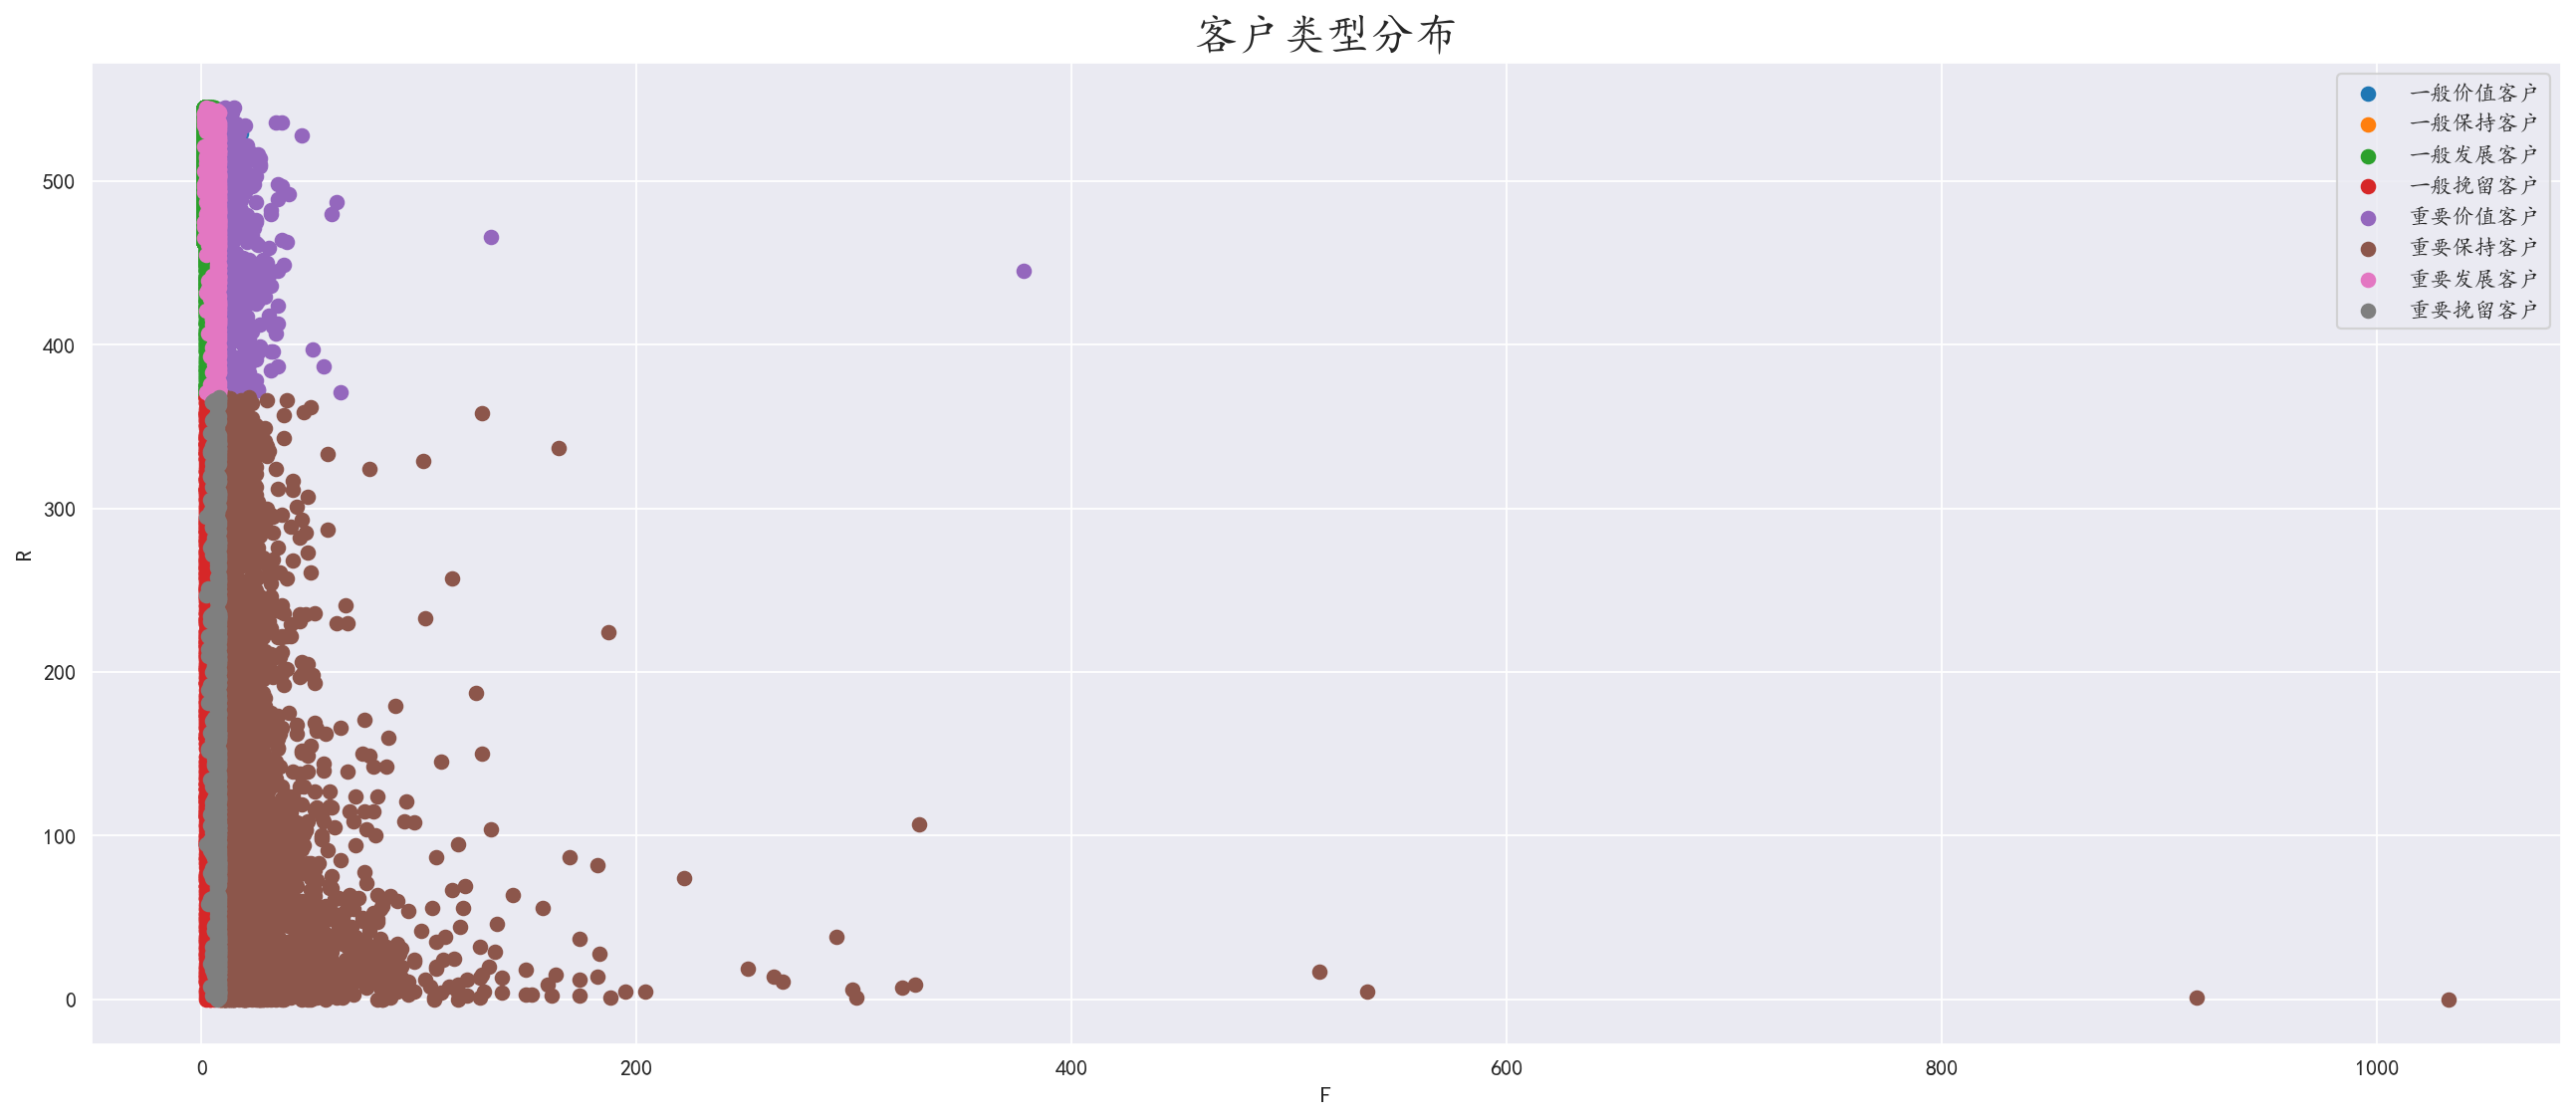

In [13]:
# 对结果可视化
plt.figure(figsize=(20, 8), dpi=160)
for label, grouped in rfm.groupby(by='label'):
    x = grouped['F']
    y = grouped['R']
    plt.scatter(x, y, label=label)
plt.legend()

plt.title('客户类型分布', fontsize=20)
plt.xlabel('F')
plt.ylabel('R')
plt.show()


### 新老用户，回流用户分析


In [14]:
pivot_counts = df.pivot_table(index='user_id',
                              columns='order_time', # 将月份排列成列
                              values='order_dt',
                              aggfunc='count').fillna(0)
df_purchase = pivot_counts.map(lambda x: 0 if x == 0 else 1)
df_purchase

order_time,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
def purchase_func(data):
    status = [] # 用户状态：unreg/ active/ inactive/ return/ new
    for i in range(18):
        if data.iloc[i] == 0: # 本月没有消费
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i - 1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('inactive')
        else: # 本月有消费
            if len(status) == 0:
                status.append('new')
            else:
                if status[i - 1] == 'unreg':
                    status.append('new')
                elif status[i - 1] == 'inactive':
                    status.append('return')
                else:
                    status.append('active')
    return pd.Series(status, df_purchase.columns)
    

purchase_status = df_purchase.apply(purchase_func, axis=1)
purchase_status

order_time,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
2,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
3,new,inactive,return,active,inactive,inactive,inactive,inactive,inactive,inactive,return,inactive,inactive,inactive,inactive,inactive,return,inactive
4,new,inactive,inactive,inactive,inactive,inactive,inactive,return,inactive,inactive,inactive,return,inactive,inactive,inactive,inactive,inactive,inactive
5,new,active,inactive,return,active,active,active,inactive,return,inactive,inactive,return,active,inactive,inactive,inactive,inactive,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
23567,unreg,unreg,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
23568,unreg,unreg,new,active,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive


<Axes: xlabel='order_time'>

<Figure size 3200x1280 with 0 Axes>

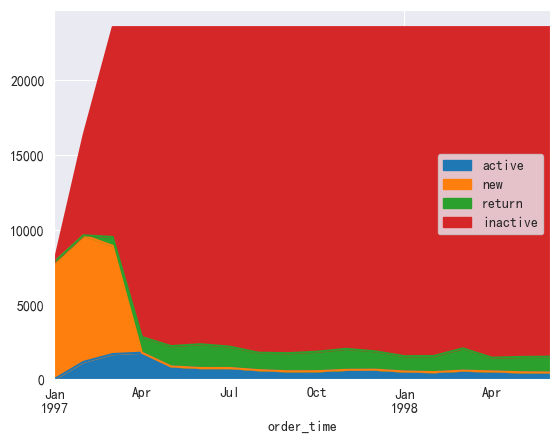

In [28]:
purchase_status_count = purchase_status.replace('unreg', np.nan).apply(lambda x: x.value_counts())
purchase_status_count.fillna(0, inplace=True)
purchase_status_count = purchase_status_count.reindex(['active', 'new', 'return', 'inactive']).T
plt.figure(figsize=(20, 8), dpi=160)
purchase_status_count.plot.area()

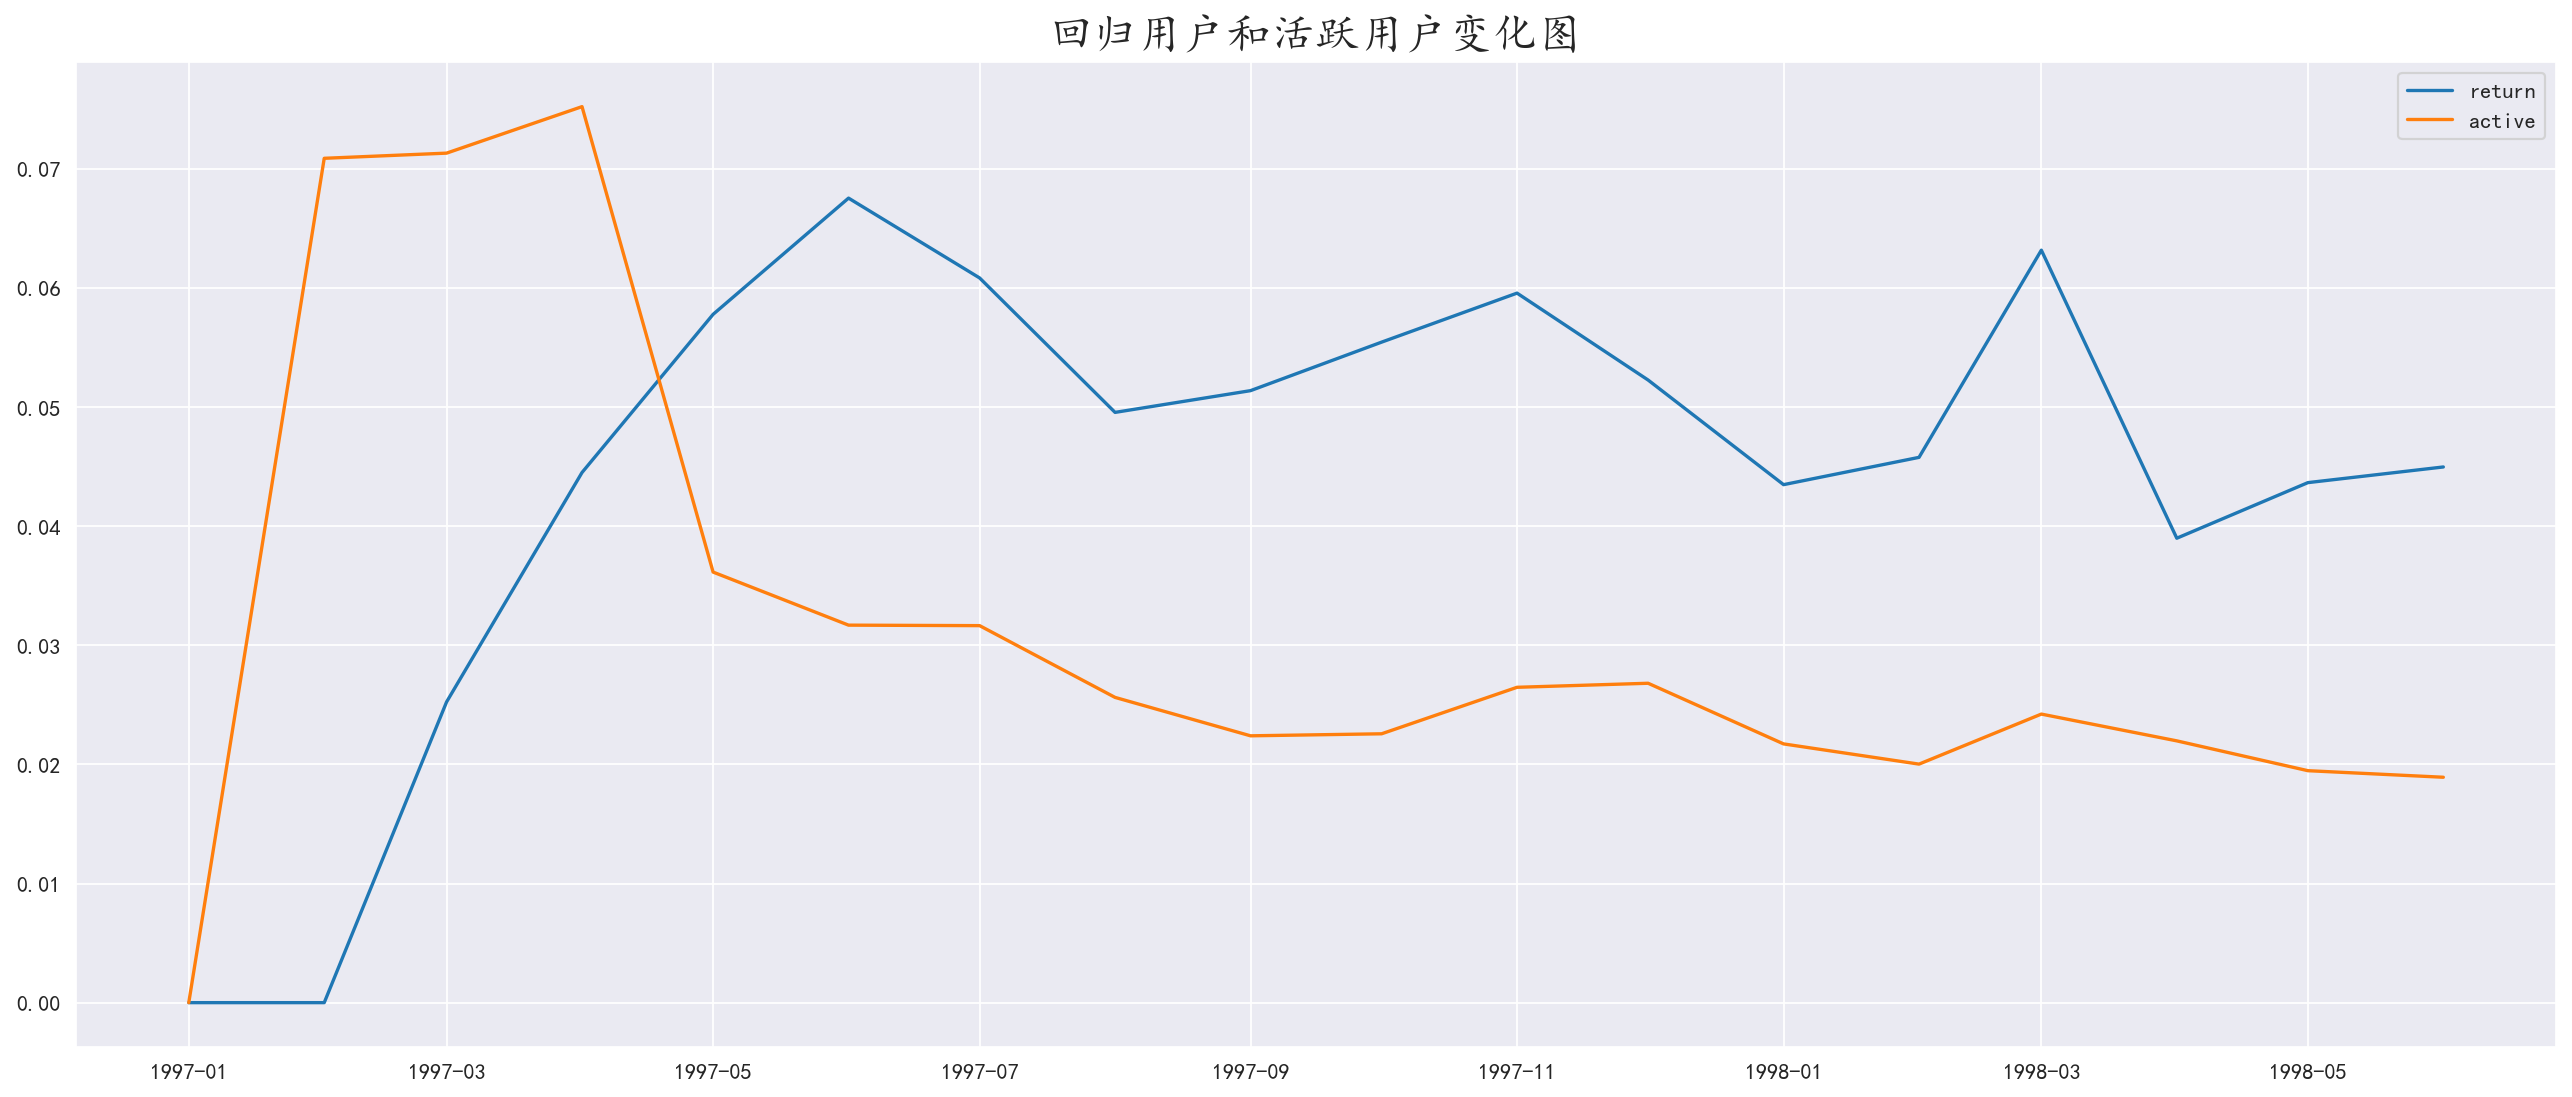

In [17]:
# 分析各种用户占比
rate = purchase_status_count.apply(lambda x: (x/x.sum()), axis=1)
plt.figure(figsize=(20, 8), dpi=160)
plt.plot(rate.index.to_timestamp(), rate['return'], label='return')
plt.plot(rate.index.to_timestamp(), rate['active'], label='active')
plt.title('回归用户和活跃用户变化图', fontsize=20)
plt.legend()
plt.show()

In [18]:
# 分析用户的消费周期
order_diff = df.groupby(by='user_id')['order_dt'].apply(lambda x: x - x.shift())
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_dt, dtype: object

<Axes: ylabel='Frequency'>

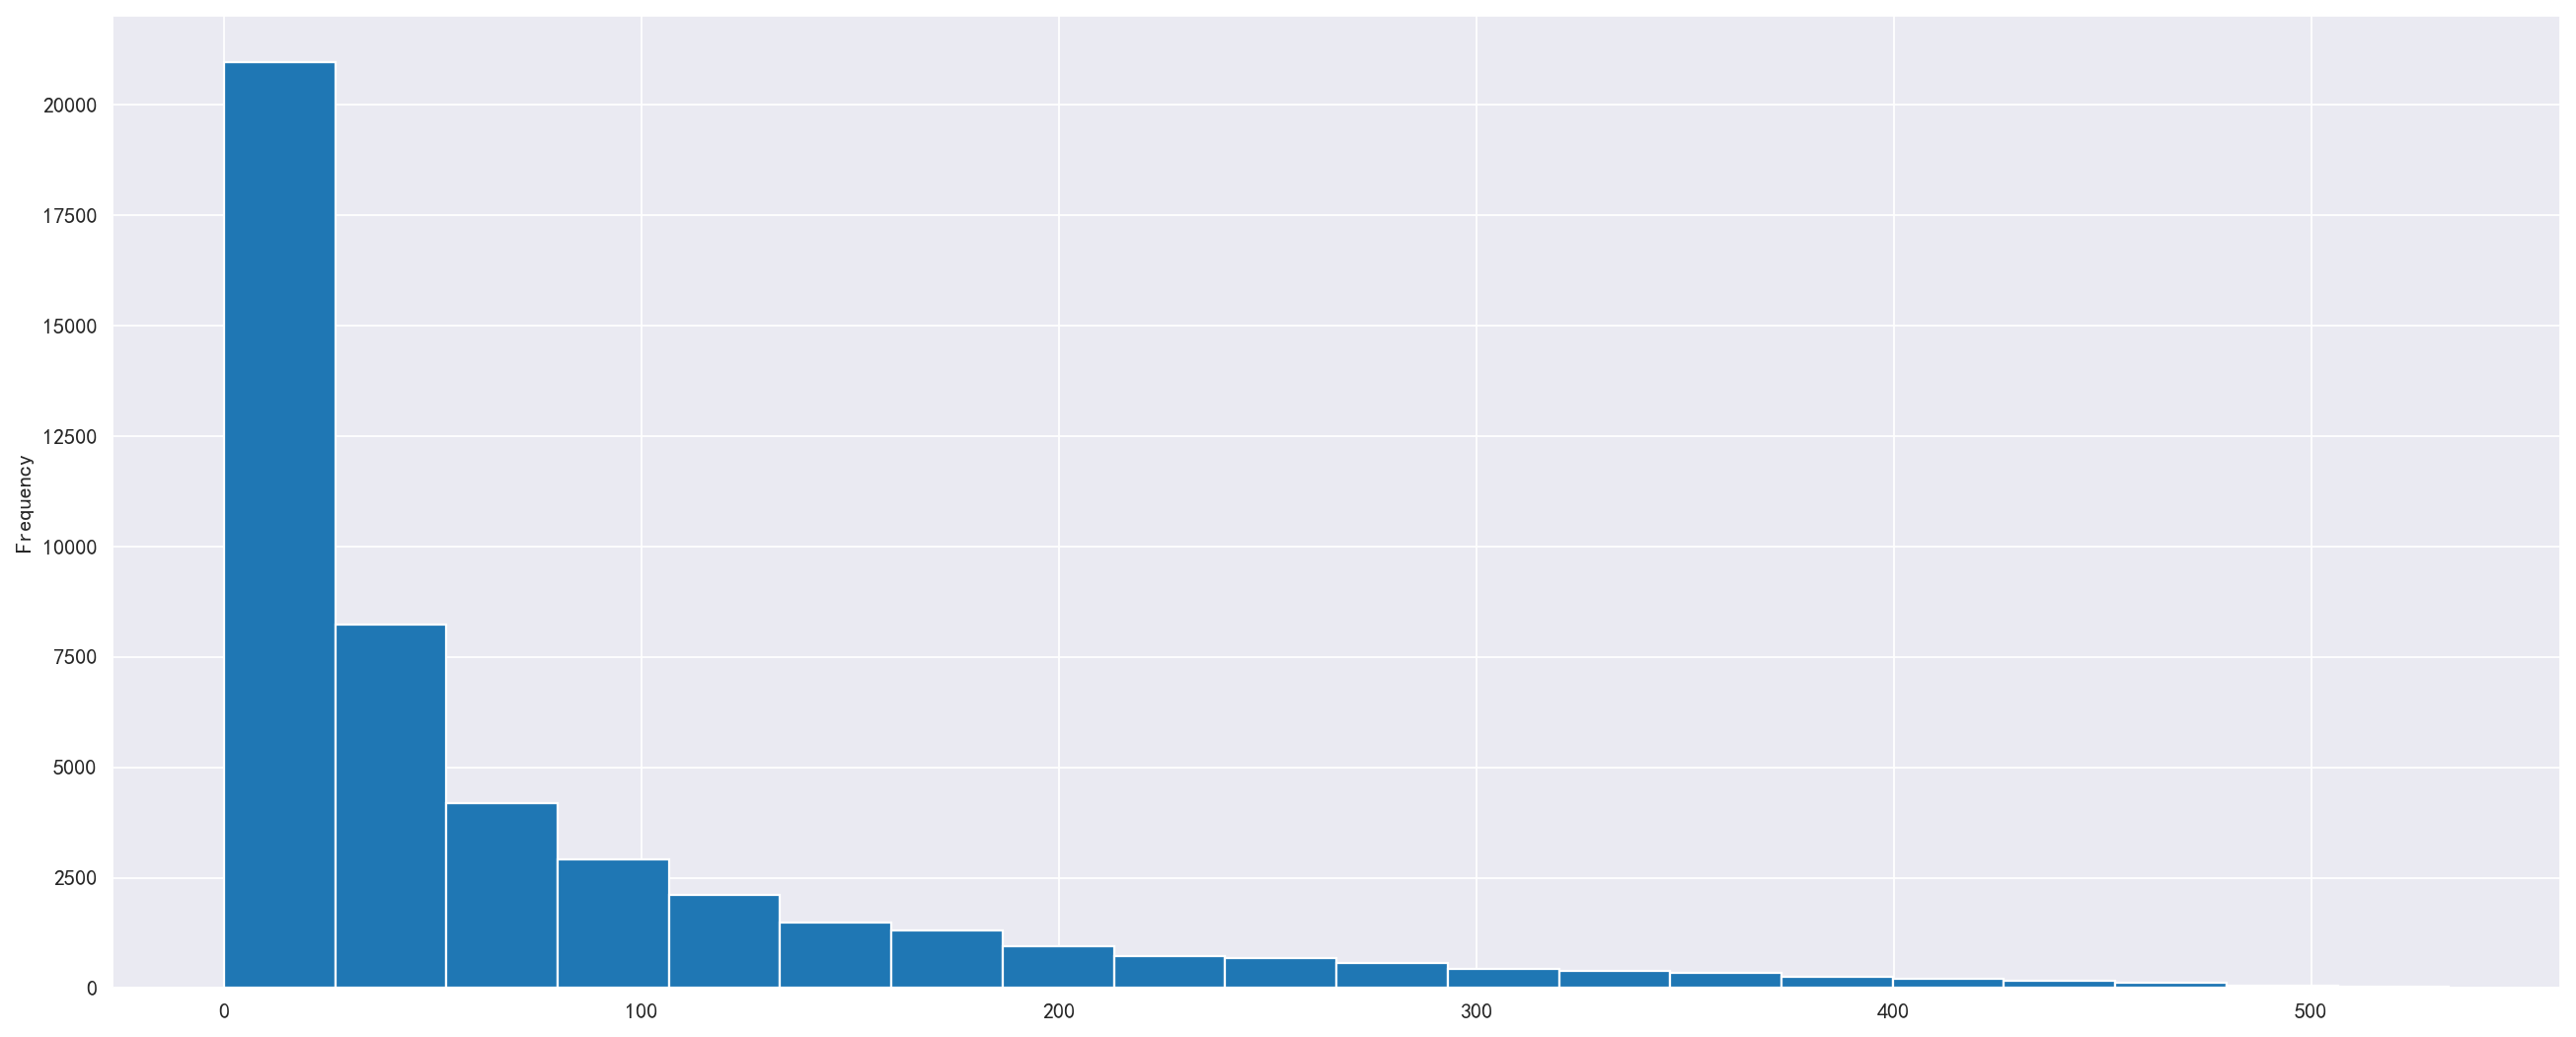

In [19]:
# 可视化消费周期
plt.figure(figsize=(20, 8), dpi=160)
(order_diff / np.timedelta64(1, 'D')).plot(kind='hist', bins=20)

### 用户的生命周期分析


In [20]:
order_period = df.groupby(by='user_id')['order_dt'].apply(lambda x: x.max() - x.min())
order_period

user_id
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
          ...   
23566     0 days
23567     0 days
23568    28 days
23569     0 days
23570     1 days
Name: order_dt, Length: 23570, dtype: timedelta64[ns]

Text(0.5, 1.0, '多次购买用户的生命周期')

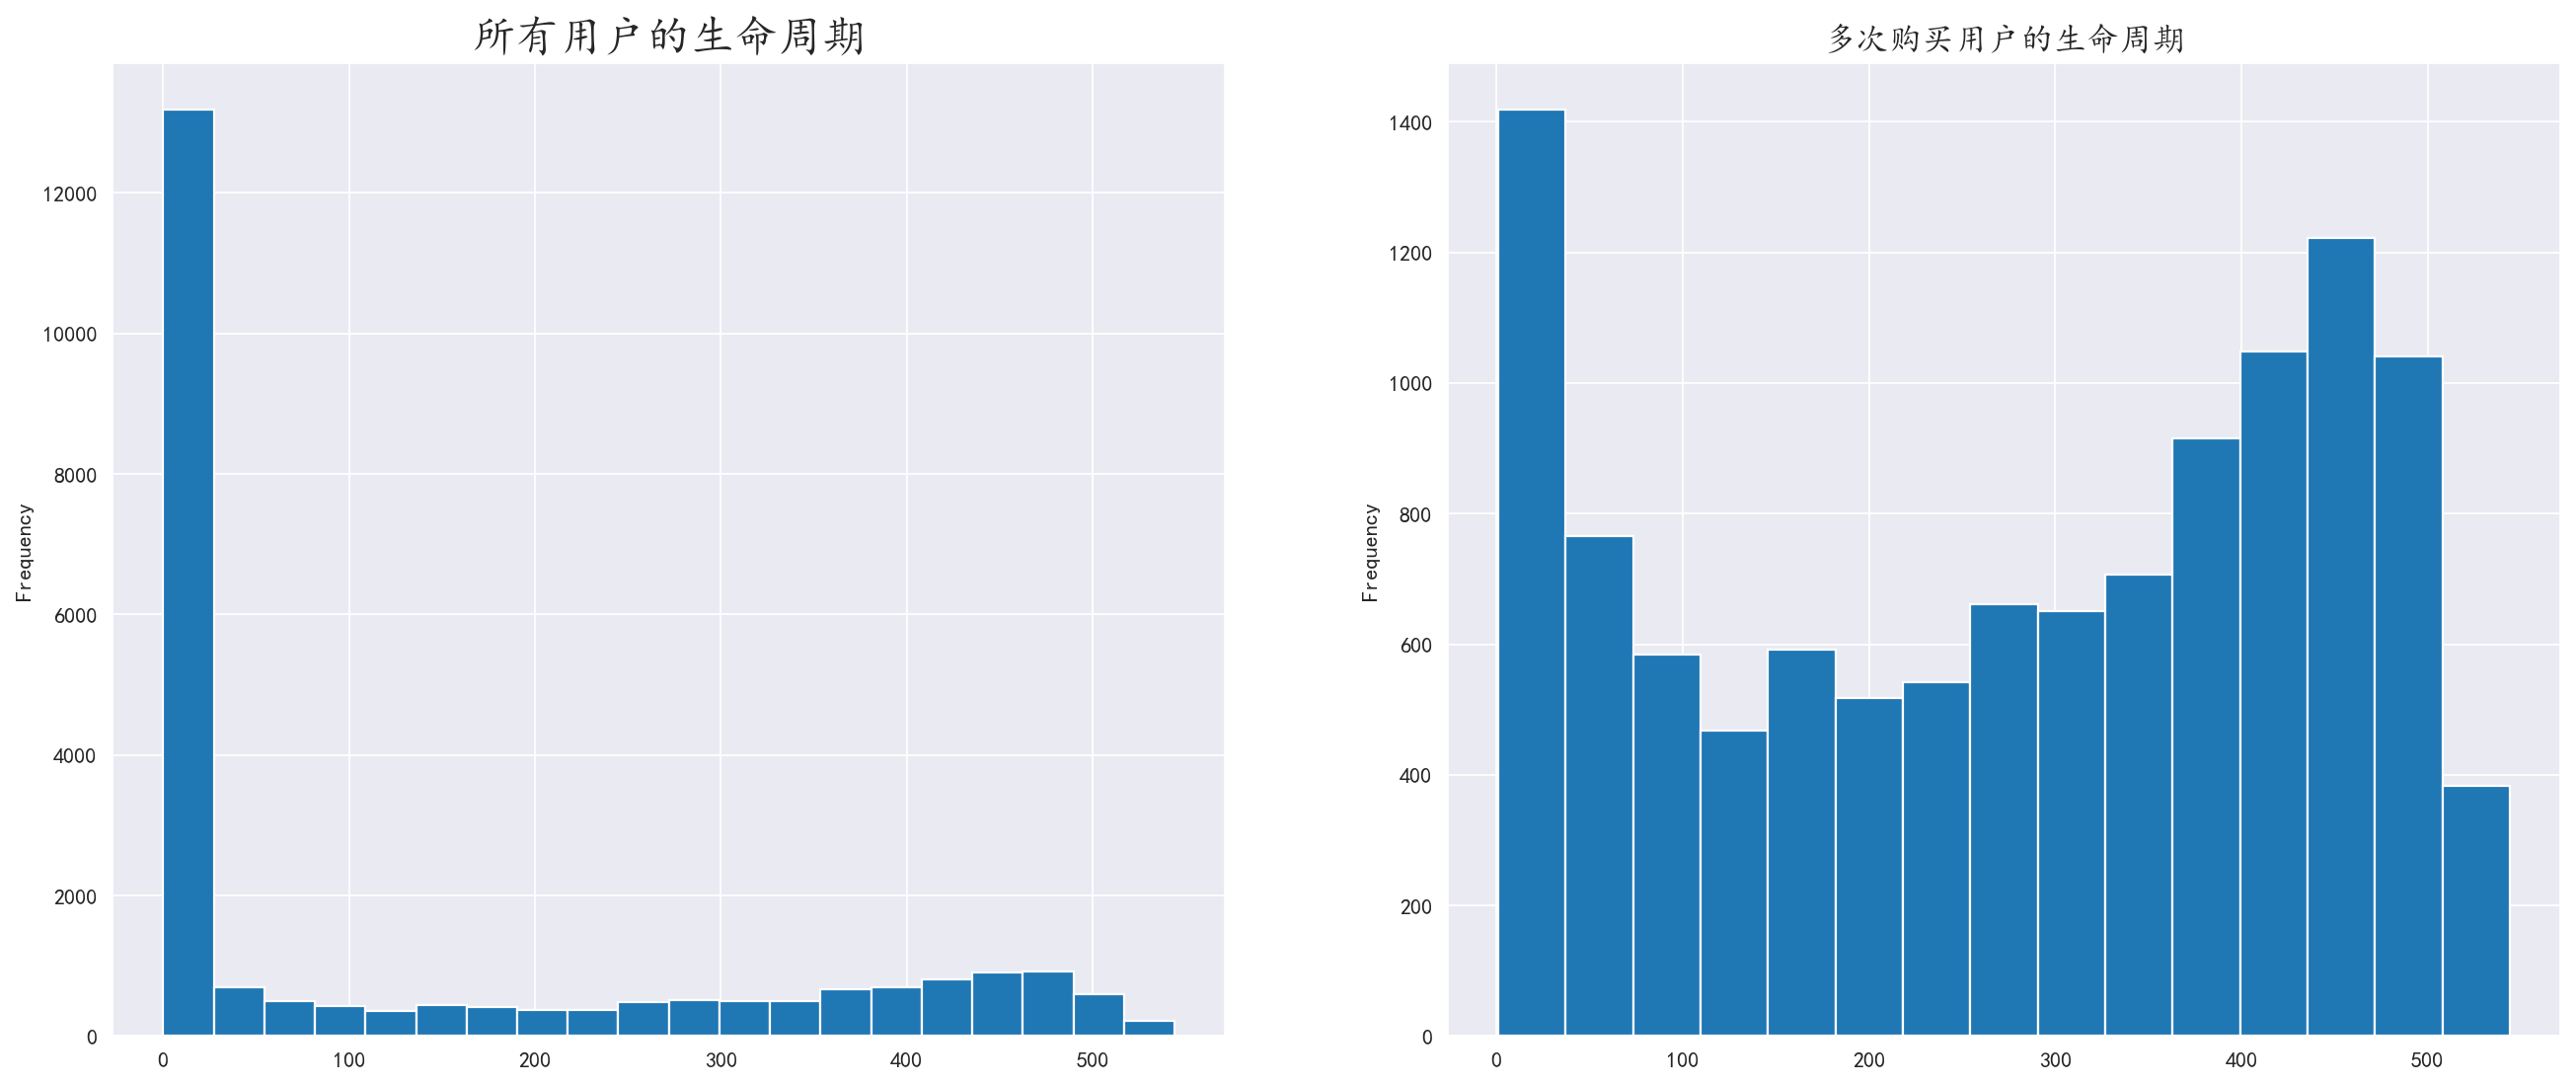

In [21]:
# 用户生命周期可视化
plt.figure(figsize=(20, 8), dpi=160)

plt.subplot(121)
(order_period / np.timedelta64(1, 'D')).plot(kind='hist', bins=20)
plt.title('所有用户的生命周期', fontsize=20)

u_1 = order_period[order_period / np.timedelta64(1, 'D') > 0]
plt.subplot(122)
(u_1 / np.timedelta64(1, 'D')).plot(kind='hist', bins=15)
plt.title('多次购买用户的生命周期', fontsize=15)

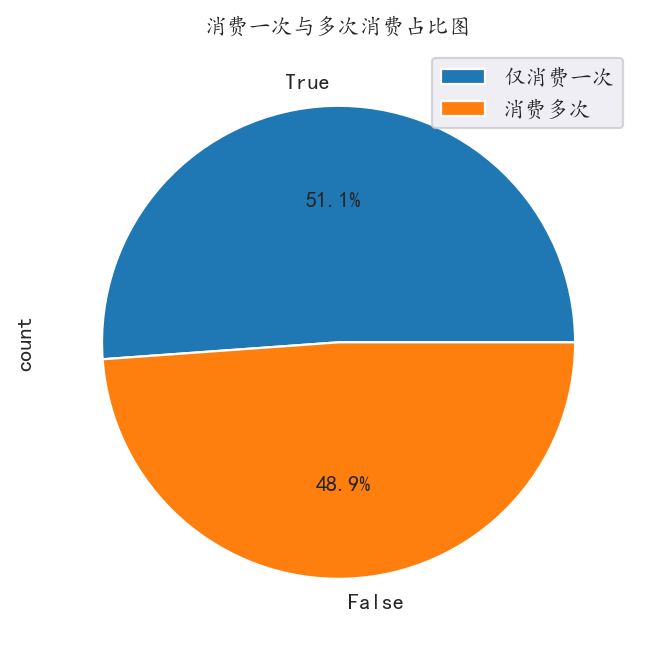

In [30]:
order_life = df.groupby(by='user_id')['order_dt'].agg(['max', 'min'])
plt.figure(dpi=160)
(order_life['max'] == order_life['min']).value_counts().plot.pie(autopct='%1.1f%%')

plt.title('消费一次与多次消费占比图', fontsize=10)
plt.legend(['仅消费一次', '消费多次'])

### 复购率和回购率的分析


Text(0.5, 1.0, '复购率走势图')

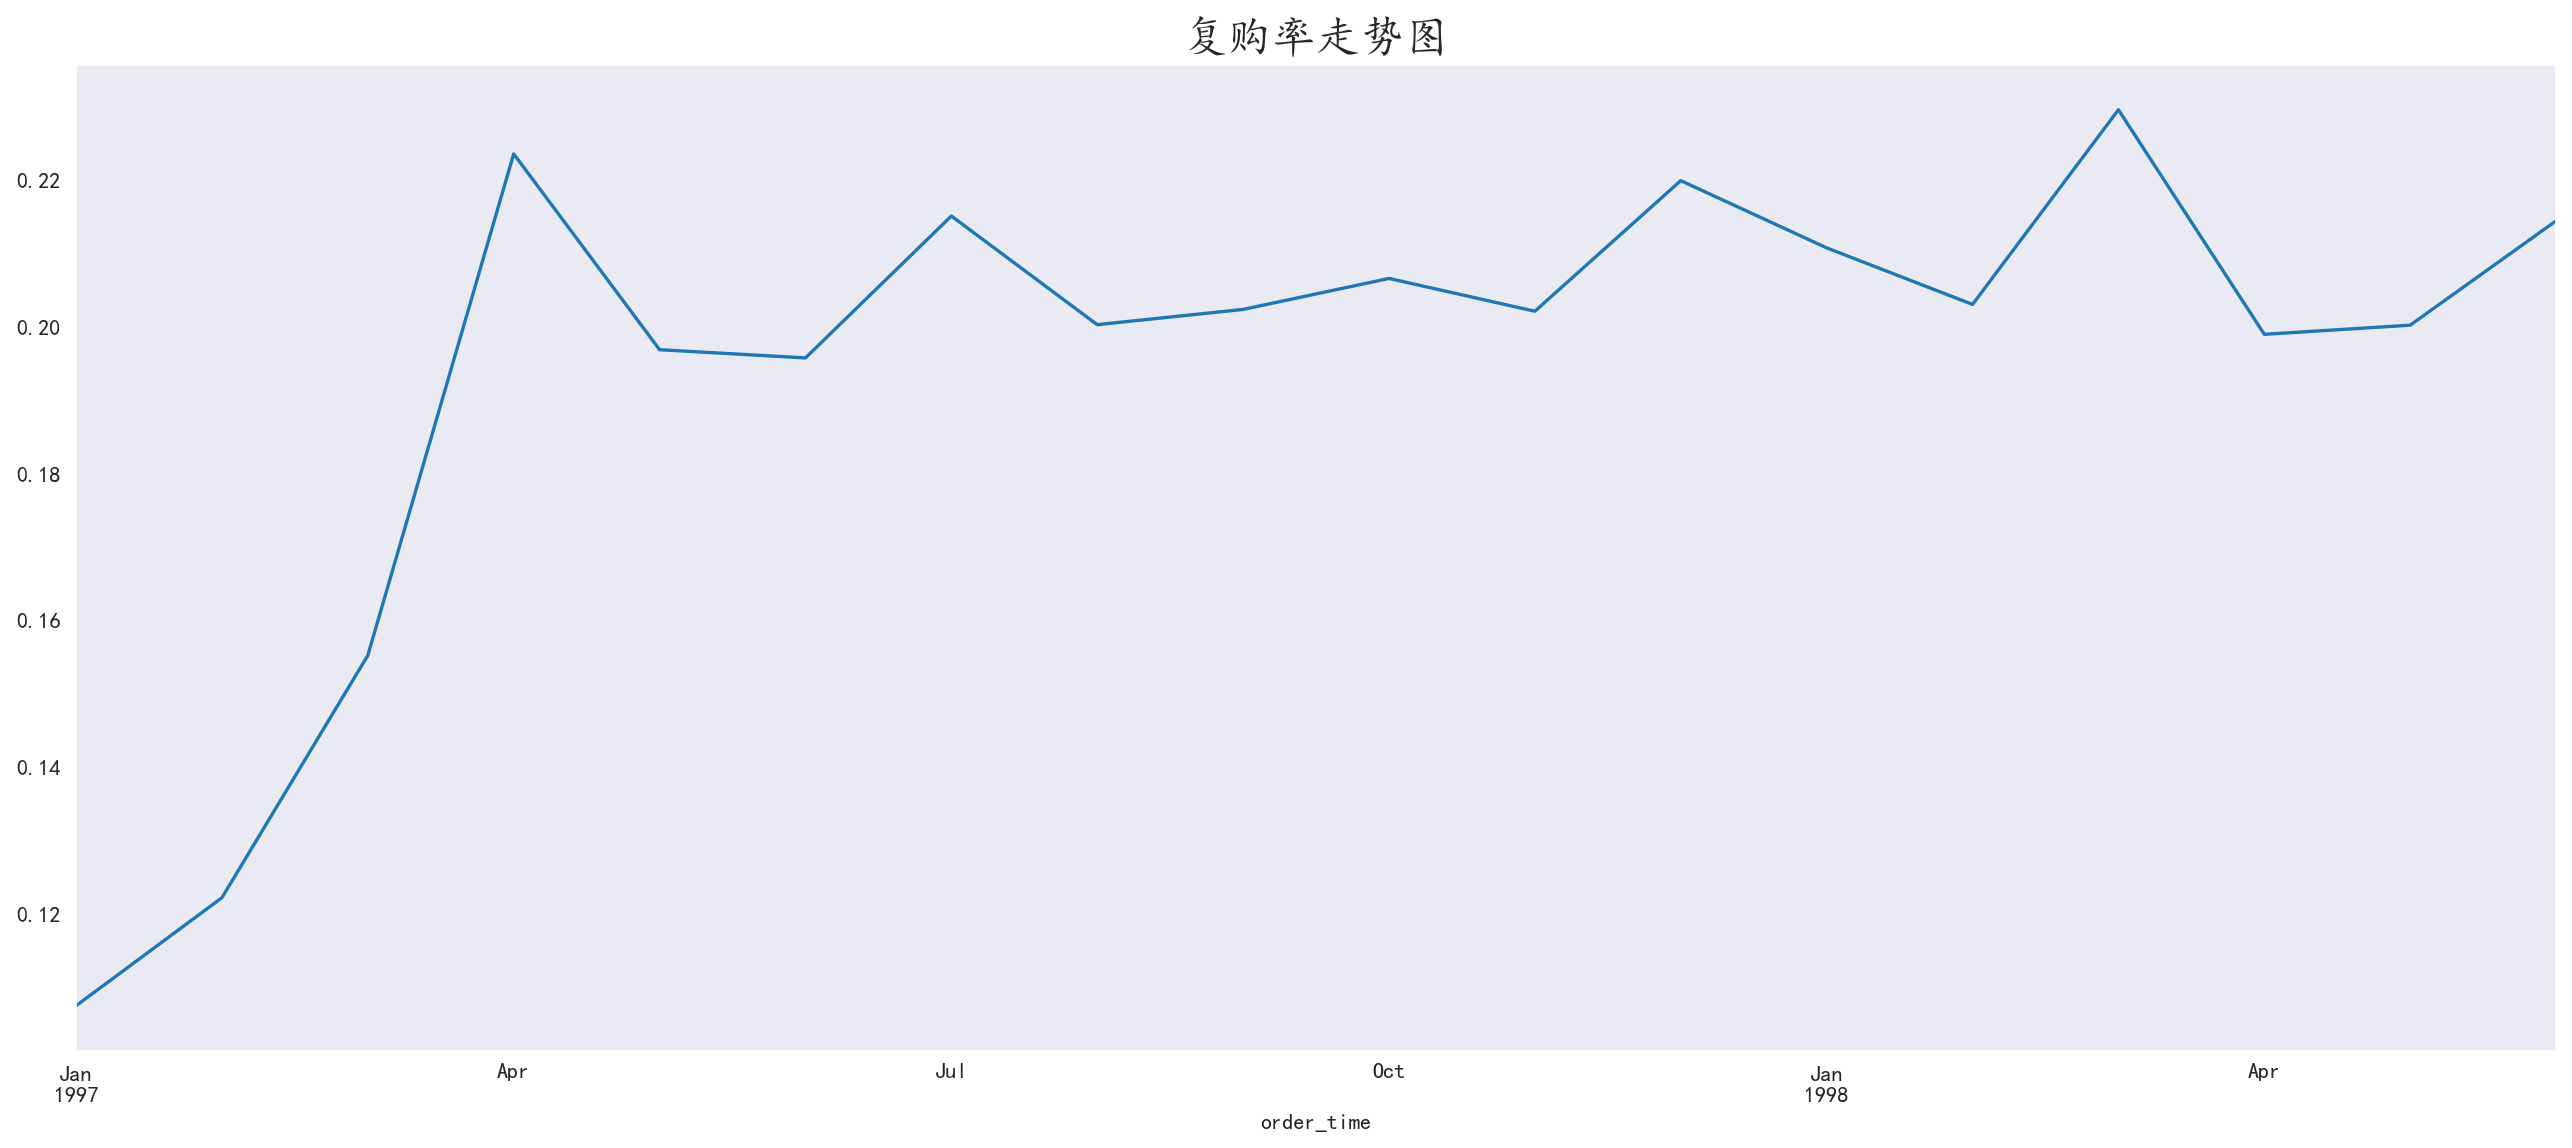

In [23]:
# 复购用户：1 非复购用户 0 未消费用户：NaN
reorder_data = pivot_counts.map(lambda x: 1 if x > 1 else np.nan if x == 0 else 0)
reorder_users = reorder_data.sum() # 复购用户
order_users = reorder_data.count() # 参与购物的用户

plt.figure(figsize=(20, 8), dpi=160)
(reorder_users / order_users).plot()
plt.grid()
plt.title('复购率走势图', fontsize=20)


In [24]:
# 回购率分析
df_purchase

order_time,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


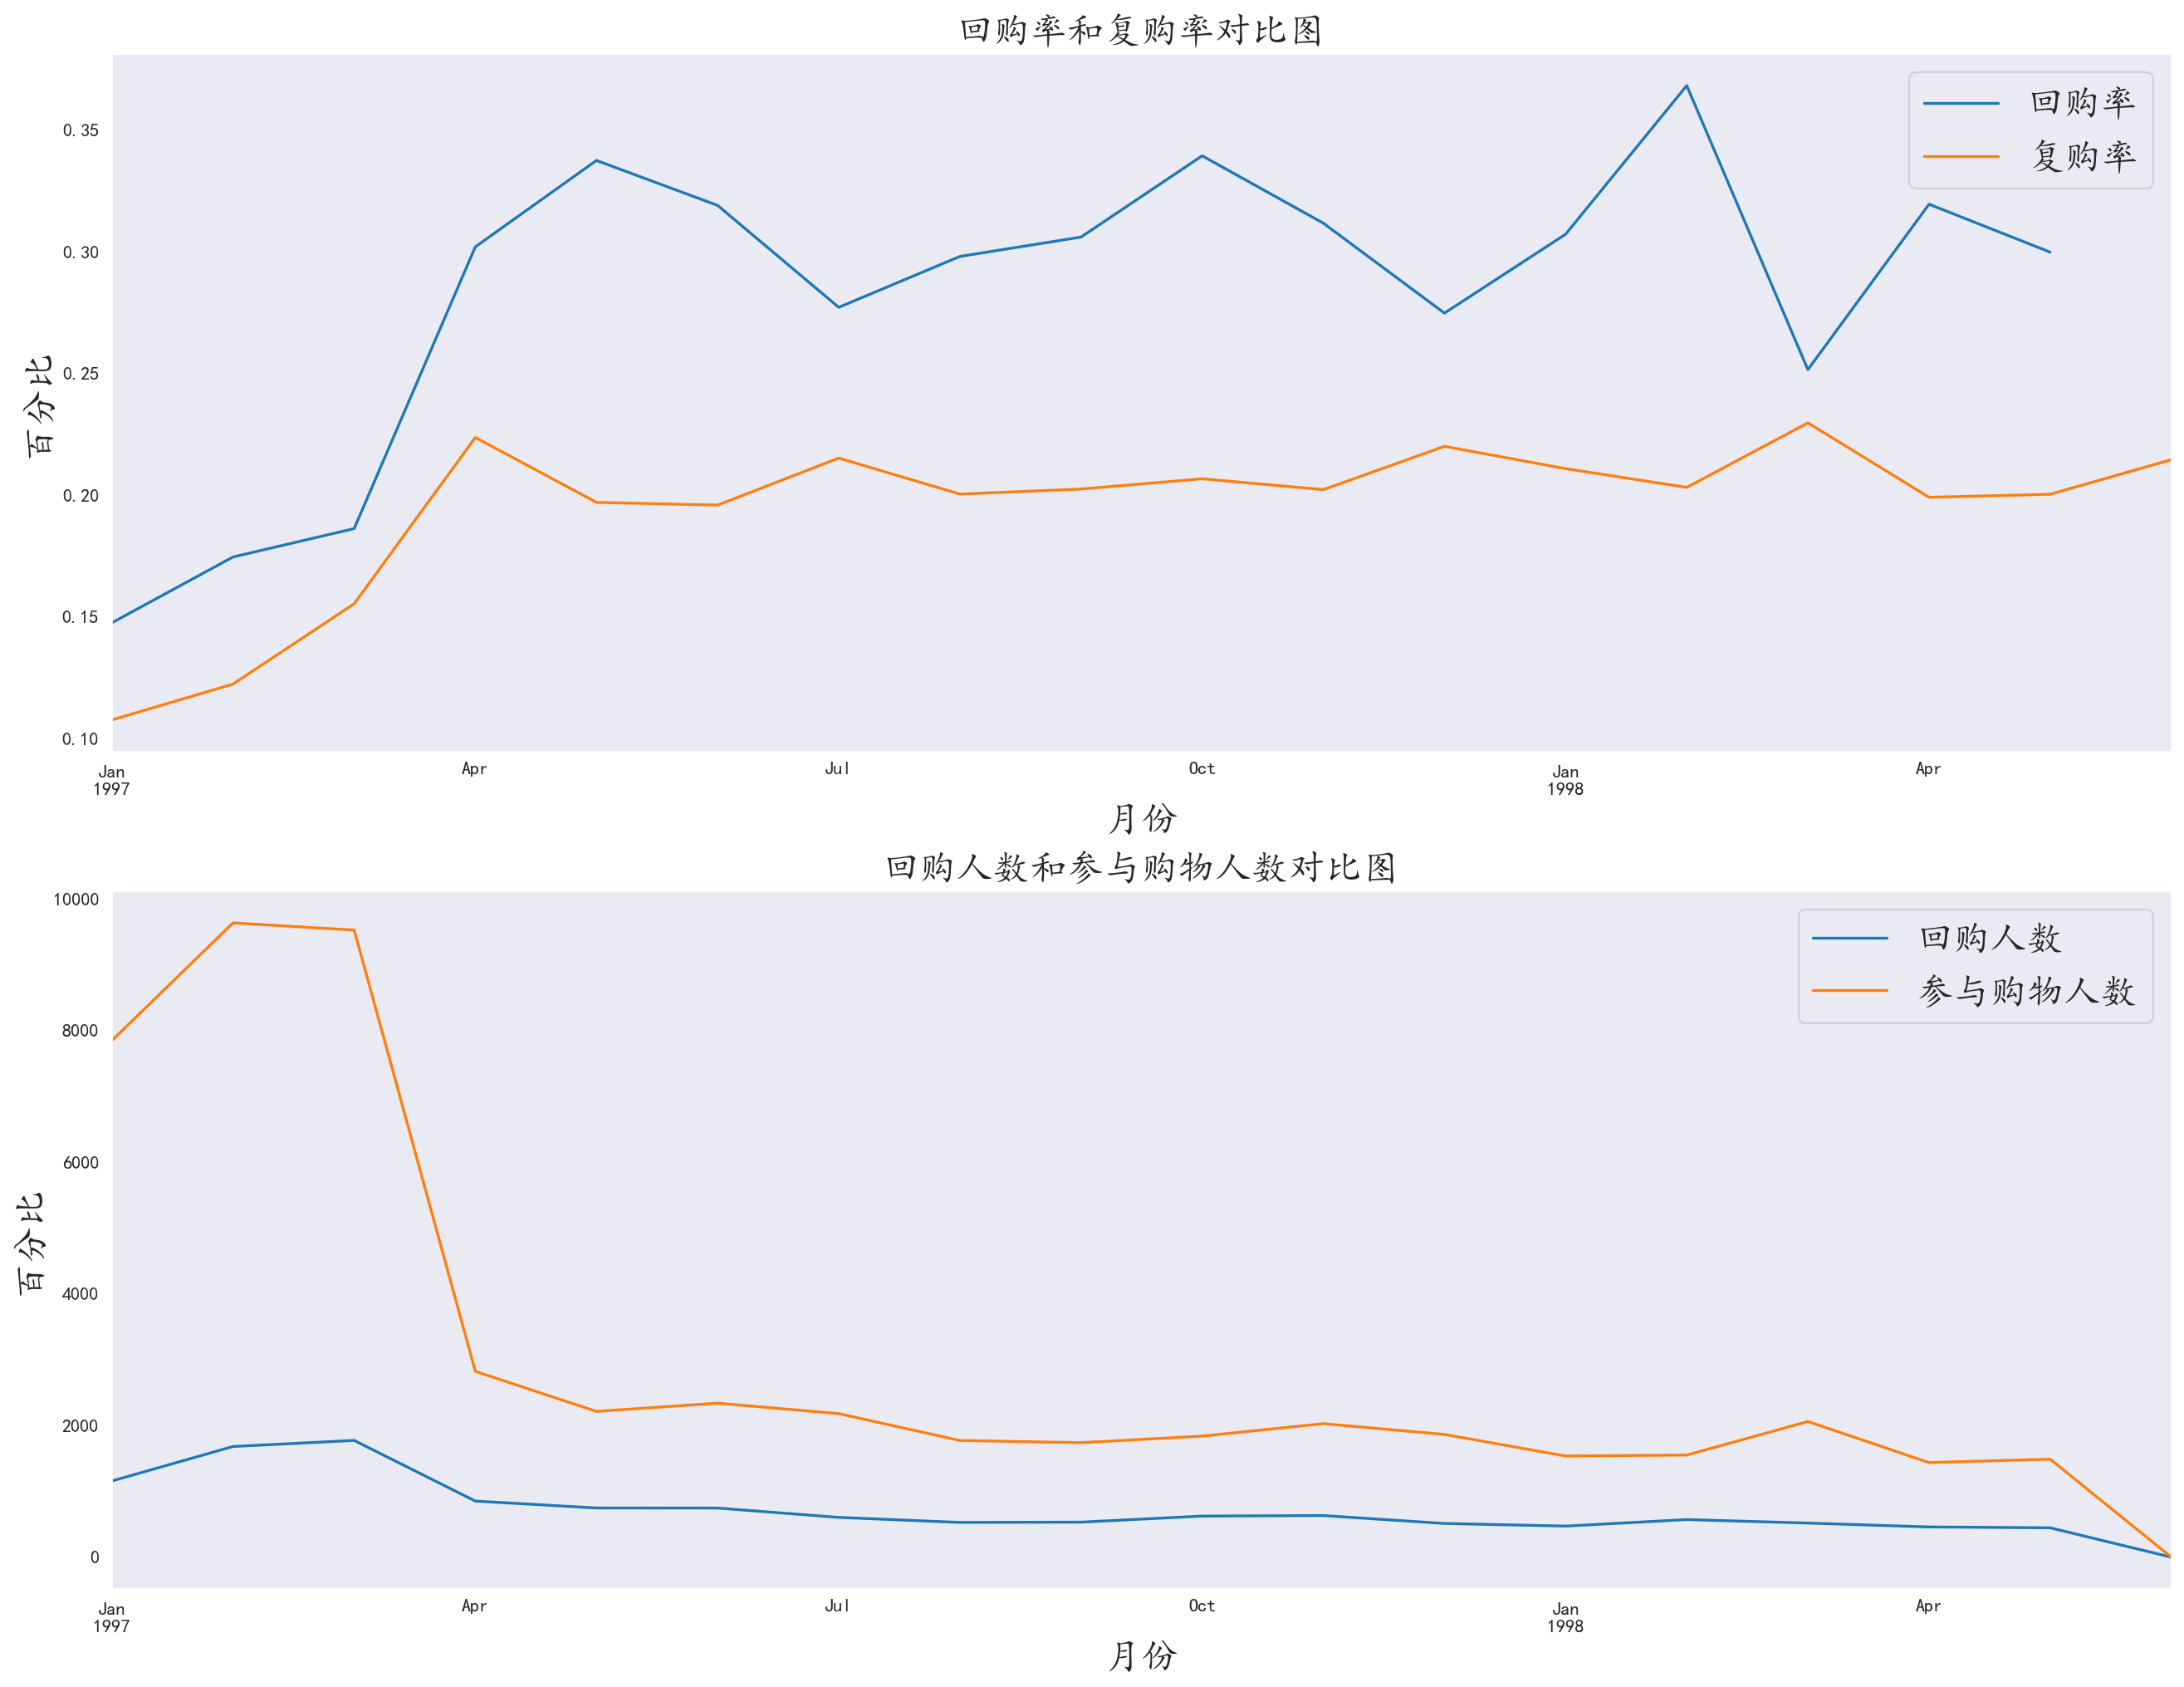

In [25]:
# 当月有购买，下个月也有购买 为1
# 当月有购买，下个月没有购买 为0
# 当月没有购买，为nan
def return_order(data):
    status = []
    for i in range(18):
        if i == 17:
            status.append(np.nan)
            break
        if data.iloc[i] == 1: # 当月有购买
            if data.iloc[i + 1] == 1: # 下个月也有购买
                status.append(1)
            else: # 下个月没有购买
                status.append(0)
        else:# 当月没有购买
            status.append(np.nan)
    return pd.Series(status, df_purchase.columns)


return_order_data = df_purchase.apply(return_order, axis=1)
return_order_num = return_order_data.sum() # 回购用户
order_num = return_order_data.count() # 参与购物用户

plt.figure(figsize=(20, 15), dpi=160)
plt.subplot(211)
(return_order_num / order_num).plot(label='回购率')
(reorder_users / order_users).plot(label='复购率')

plt.grid()
plt.title('回购率和复购率对比图', fontsize=20)
plt.xlabel('月份', fontsize=20)
plt.ylabel('百分比', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(212)
return_order_num.plot(label='回购人数')
order_num.plot(label='参与购物人数')
plt.grid()
plt.title('回购人数和参与购物人数对比图', fontsize=20)

plt.xlabel('月份', fontsize=20)
plt.ylabel('百分比', fontsize=20)
plt.legend(fontsize=20)